# Organoid Learning Evaluation
Using the CartPole system as a dynamic control task, these methods evaluate the adaptive learning capacity of cortical organoids using short, high-frequency training signals to targeted neurons.

In [2]:
import os
import sys
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt
import pandas as pd

# Check module path
module_path = os.path.abspath(os.path.join(''))  # adjust if needed
if module_path not in sys.path:
    sys.path.append(module_path)

# Import / reload full modules
import core.data_loader as data_loader
importlib.reload(data_loader)
import core.analysis_utils as analysis_utils
importlib.reload(analysis_utils)
import viz.plots_general as plots_general
importlib.reload(plots_general)
import braindance
importlib.reload(braindance)
import core.map_utils as map_utils
importlib.reload(map_utils)
import OrgLearningEval
importlib.reload(OrgLearningEval)

# Import specific functions
from OrgLearningEval import OrgLearningEval


In [3]:
# Check if core directory is in sys.path

# Print out current working directory
print("Current working directory:", os.getcwd())

# Print search path list
print("\nPython sys.path:")
for p in sys.path:
    print("  ", p)

# Check whether 'core/data_loader.py' exists from this working directory
core_path = os.path.join(os.getcwd(), "core", "data_loader.py")
print("\nChecking for core/data_loader.py:")
print("Exists" if os.path.exists(core_path) else "  NOT FOUND")

# Check core directory contents
print("Contents of ./core/:", os.listdir("./core"))

Current working directory: /Users/main_mac/data/org_eval

Python sys.path:
   /Users/main_mac/data
   /Users/main_mac/data/org_eval/braindance
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug
   /opt/anaconda3/envs/brain/lib/python310.zip
   /opt/anaconda3/envs/brain/lib/python3.10
   /opt/anaconda3/envs/brain/lib/python3.10/lib-dynload
   
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages/setuptools/_vendor
   /Users/main_mac/data/org_eval

Checking for core/data_loader.py:
Exists
Contents of ./core/: ['data_loader.py', '__init__.py', 'spike_data_utils.py', '__pycache__', 'map_utils.py', 'analysis_utils.py']


In [39]:
try:
    from core.data_loader import load_pickle, load_datasets
    print("Imported successfully.")
except Exception as e:
    print("Import failed:", e)


Imported successfully.


Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

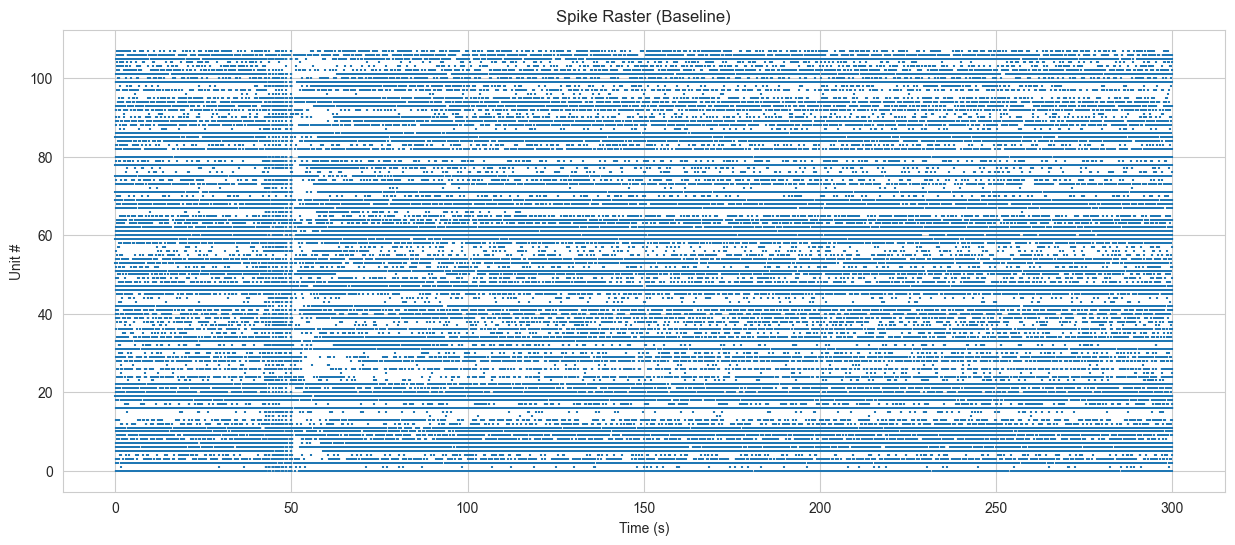

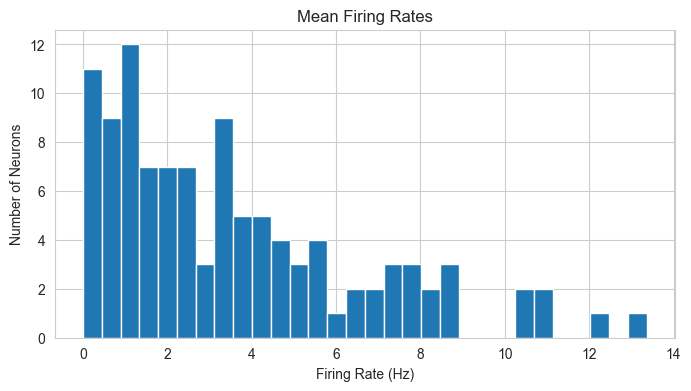

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


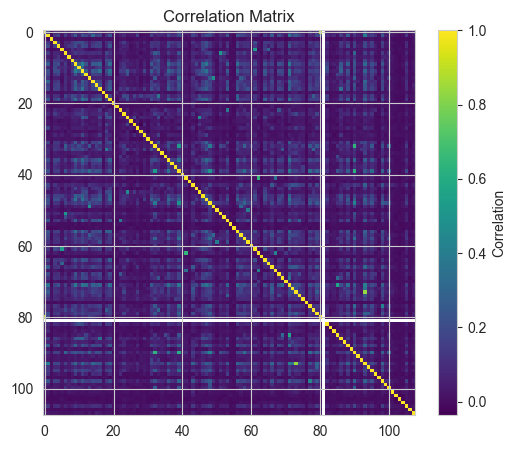

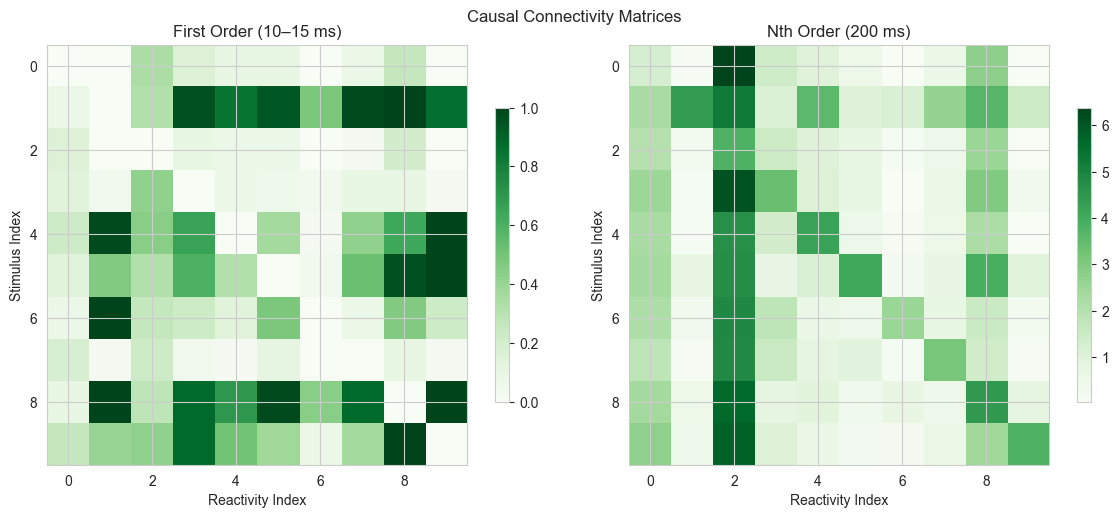

In [4]:
ole = OrgLearningEval()  # Loads all datasets and keys contained, sets "Baseline" as default dataset, and prints confirmation
ole.show_raster()        # Shows raster for default dataset
ole.show_mean_firing_rates() # Shows mean firing rate plot for default dataset
ole.show_correlation_matrix()  # Shows a correlation matrix plot for default dataset
ole.show_causal_plot() # Shows matrix of first-order and multi-order connectivity for organoid of interest

In [42]:
print("Stim Indices:", ole.metadata["stim_inds"])
print("Training Indices:", ole.metadata["training_inds"])
print("Encode Indices:", ole.metadata["encode_inds"])

Stim Indices: [0 1 2 3 4 5 6 7]
Training Indices: [1, 2, 3, 4, 5, 6]
Encode Indices: [0, 7]


In [44]:
# Get the labeled task unit info table from metadata
df = ole.metadata["task_unit_info"]

# Filter only the rows with assigned task roles
task_units = df[df["is_task_unit"] == True]

# Print to console
print(task_units)

   channel  electrode       x       y      role  is_task_unit
0        0      18598  2065.0  1470.0    encode          True
1        1      20644  3220.0  1627.5  training          True
2        2      19040  2100.0  1505.0  training          True
3        3      21723  2852.5  1715.0  training          True
4        4      14939  3482.5  1172.5  training          True
5        5      21078  3115.0  1662.5  training          True
6        6      17051  1942.5  1347.5  training          True
7        7      15172  3710.0  1190.0    encode          True
8        8      18817  2047.5  1487.5    decode          True
9        9      20640  3150.0  1627.5    decode          True


Switched to dataset: Adaptive


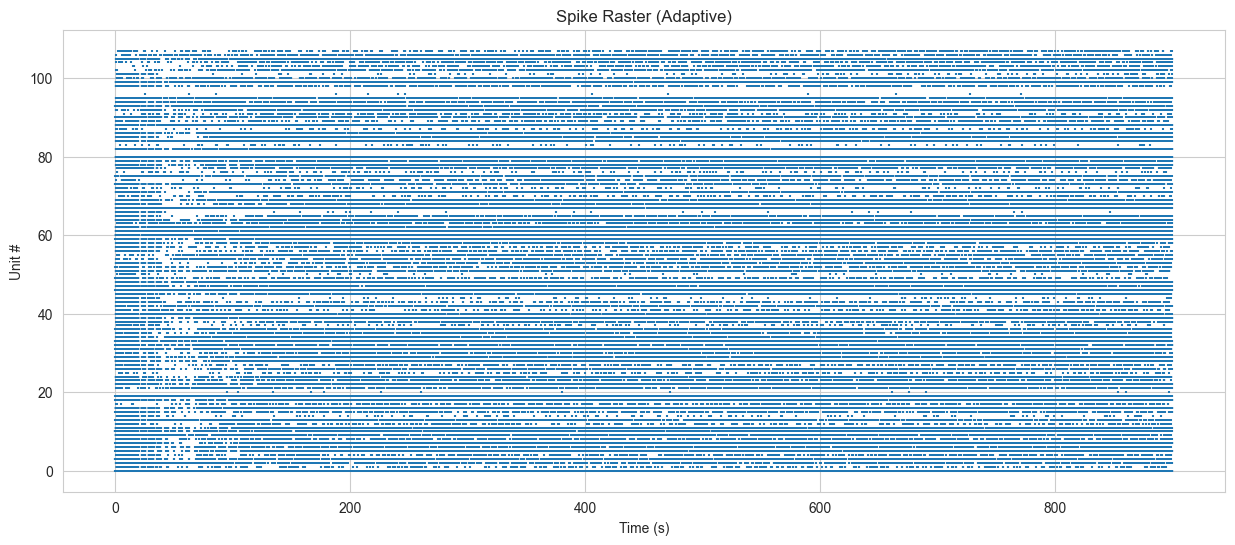

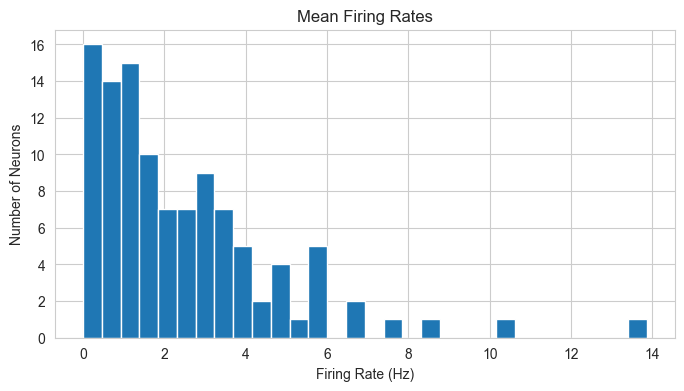

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


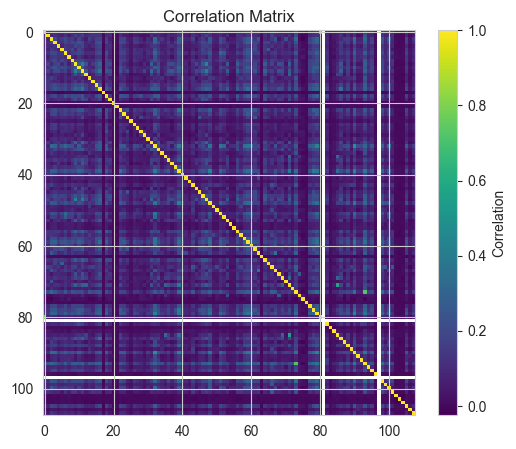

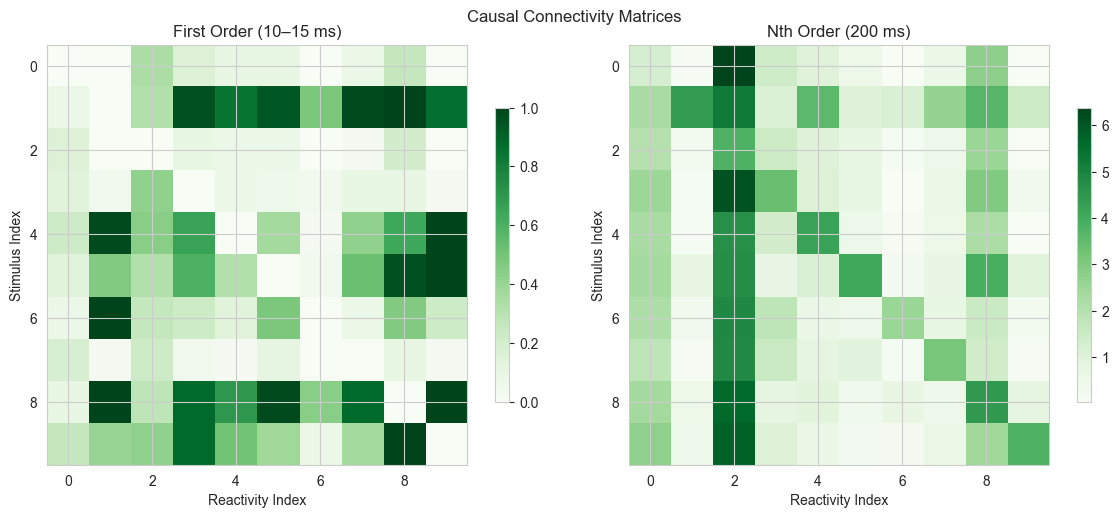

In [10]:
# Switch to different training condition and view plots
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()
ole.show_causal_plot()


In [4]:
ole = OrgLearningEval()
reward_df = ole.get_reward_df("Adaptive")
reward_df.head()

Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.Spike

time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0

In [44]:
print("Adaptive Reward DataFrame:")
display(ole.get_reward_df("Adaptive").head(10))

print("\n Random Reward DataFrame:")
display(ole.get_reward_df("Random").head(10))

print("\n Null Reward DataFrame:")
display(ole.get_reward_df("Null").head(10))

Adaptive Reward DataFrame:


time  episode  reward
0   3.911218        0    19.0
1  18.770805        1    56.0
2  24.654084        2    12.0
3  31.596691        3    17.0
4  38.112137        4    15.0
5  44.167144        5    13.0
6  50.062327        6    14.0
7  56.332156        7    14.0
8  62.393498        8    13.0
9  93.602599        9   135.0


 Random Reward DataFrame:


time  episode  reward
0   10.916741        0    53.0
1   22.128940        1    38.0
2   28.397783        2    14.0
3   35.692659        3    19.0
4   63.851734        4   120.0
5   70.520720        5    16.0
6  116.594423        6   207.0
7  128.053490        7    41.0
8  138.297740        8    35.0
9  170.118700        9   140.0


 Null Reward DataFrame:


time  episode  reward
0   4.958258        0    24.0
1  18.258702        1    48.0
2  26.177174        2    22.0
3  36.393520        3    33.0
4  42.694989        4    14.0
5  48.358414        5    11.0
6  54.321791        6    14.0
7  60.856962        7    15.0
8  68.418198        8    20.0
9  81.352820        9    46.0

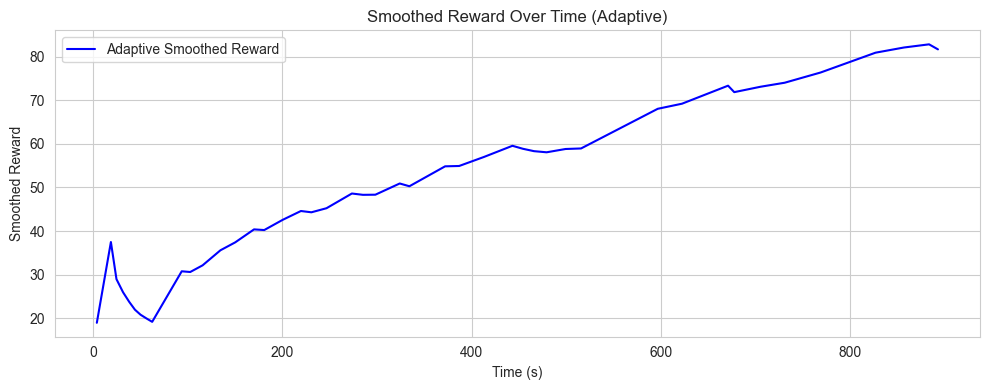

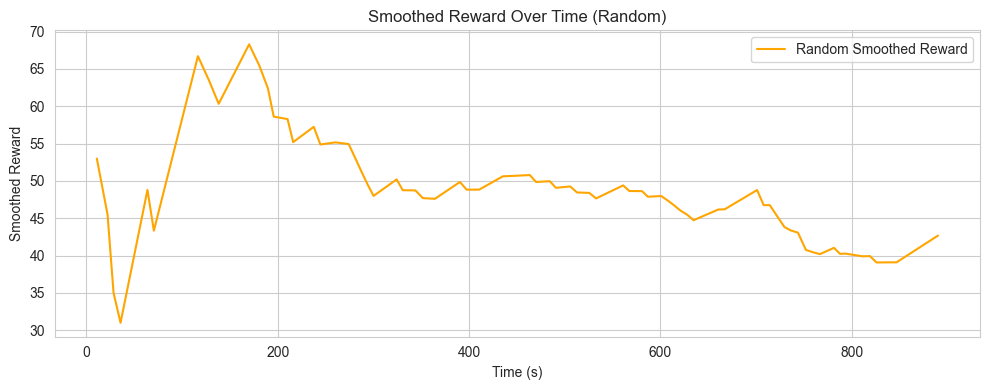

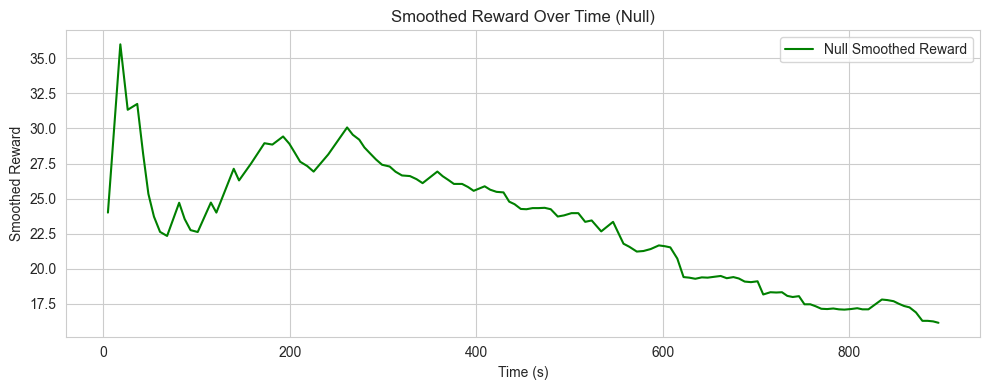

In [6]:
ole.show_reward_plot("Adaptive", color="blue")
ole.show_reward_plot("Random", color="orange")
ole.show_reward_plot("Null", color="green")

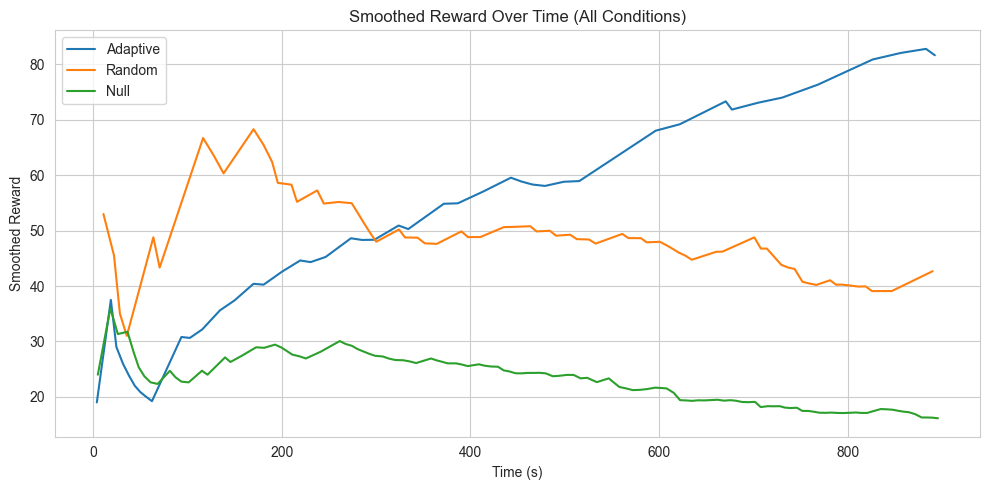

In [88]:
ole.show_all_rewards_overlay()

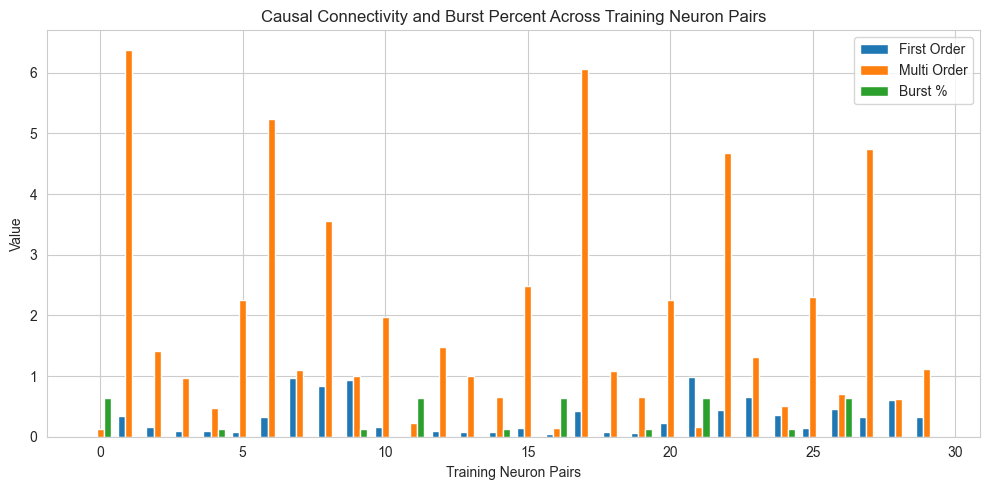

In [19]:
ole.show_training_pair_plot(num_neurons=10) # Metrics across 6 training neurons

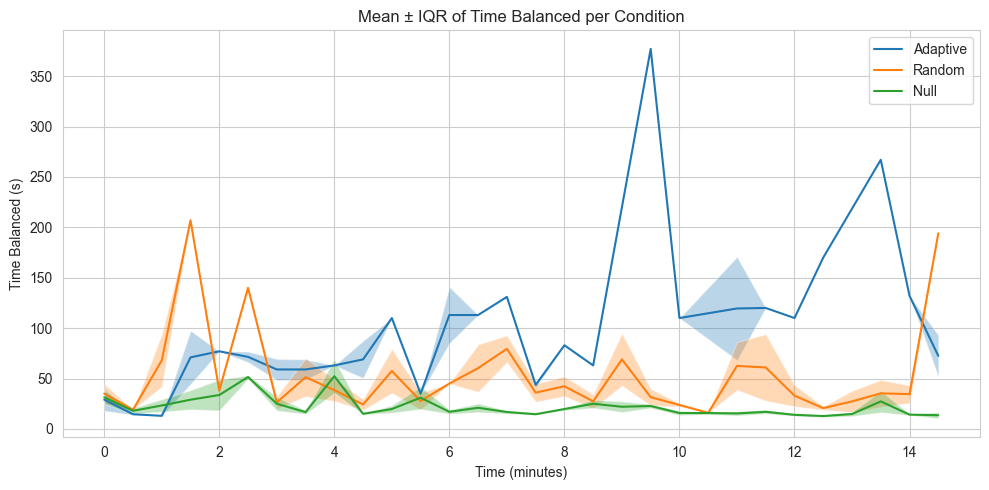

In [26]:
# Time balanced summary for all conditions
ole.show_performance_summary(bin_size=30, conditions=["Adaptive", "Random", "Null"])

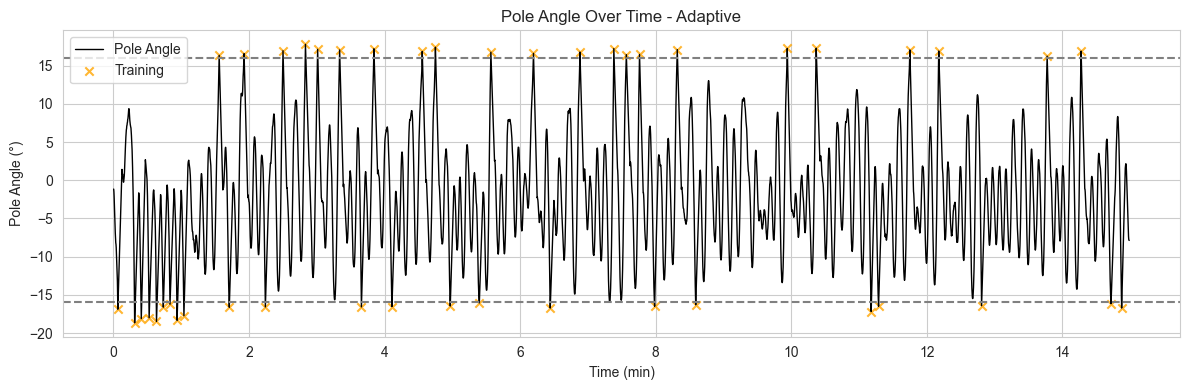

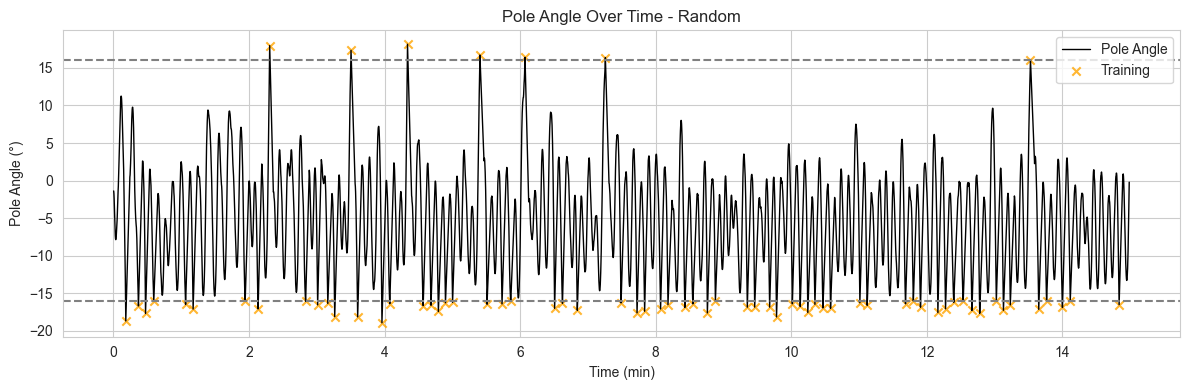

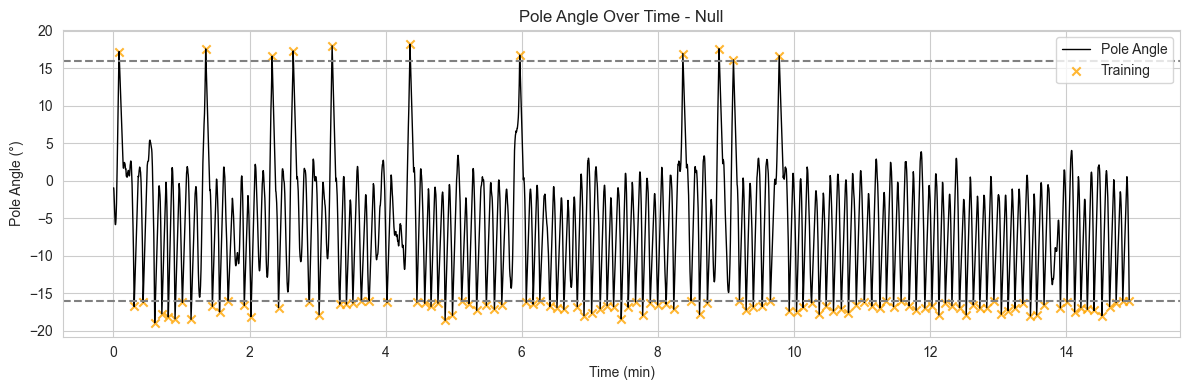

In [27]:
# Plot pole angle over time with shaded episodes and stim timings
ole.show_pole_angle_trajectories("Adaptive")
ole.show_pole_angle_trajectories("Random")
ole.show_pole_angle_trajectories("Null")

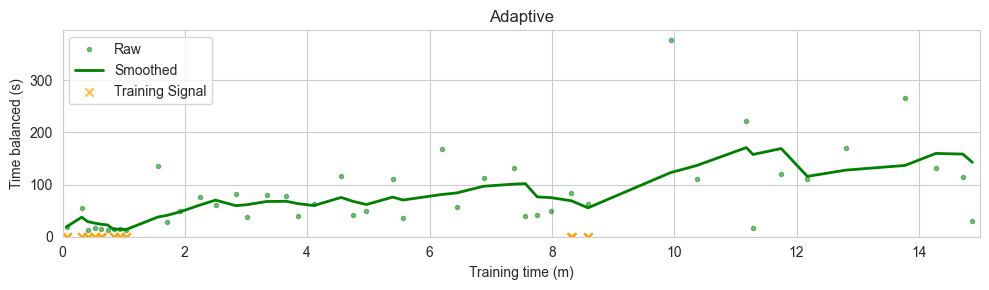

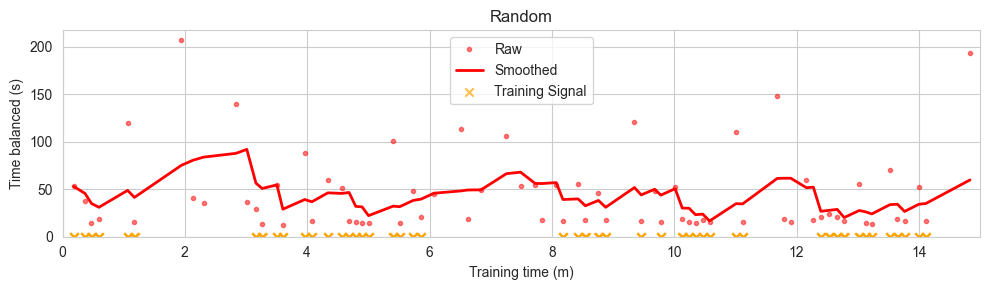

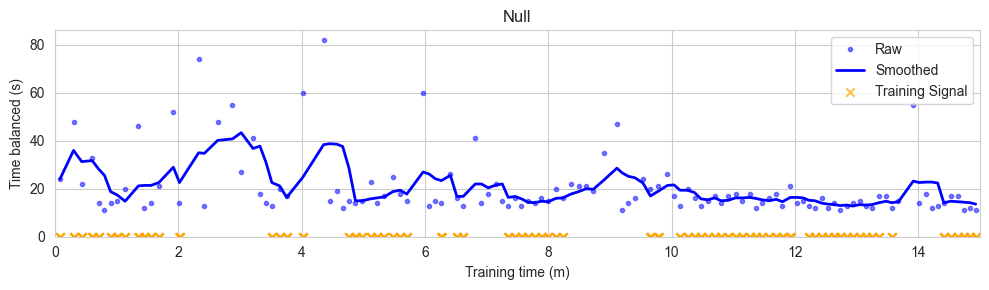

In [28]:
# Show episode vs training overlay for different conditions
ole.show_time_balanced_vs_training("Adaptive", color="green")
ole.show_time_balanced_vs_training("Random", color="red")
ole.show_time_balanced_vs_training("Null", color="blue")

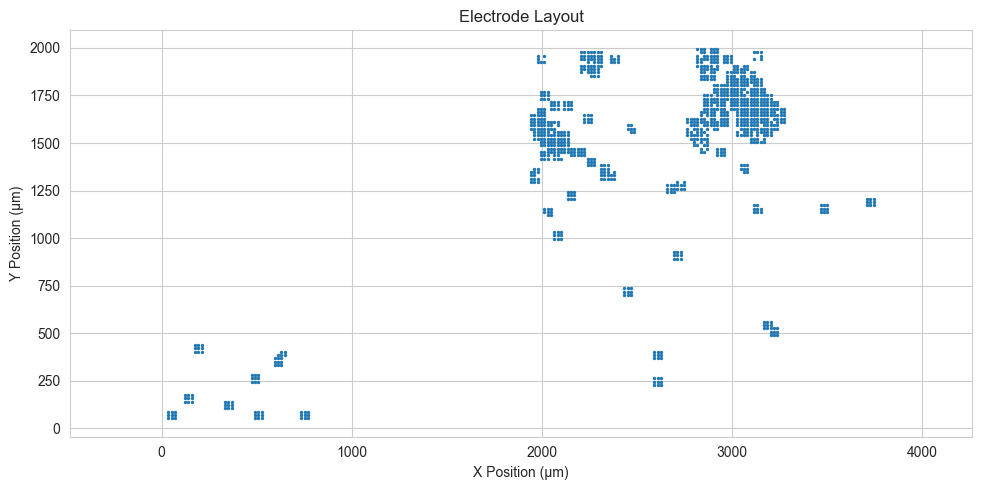

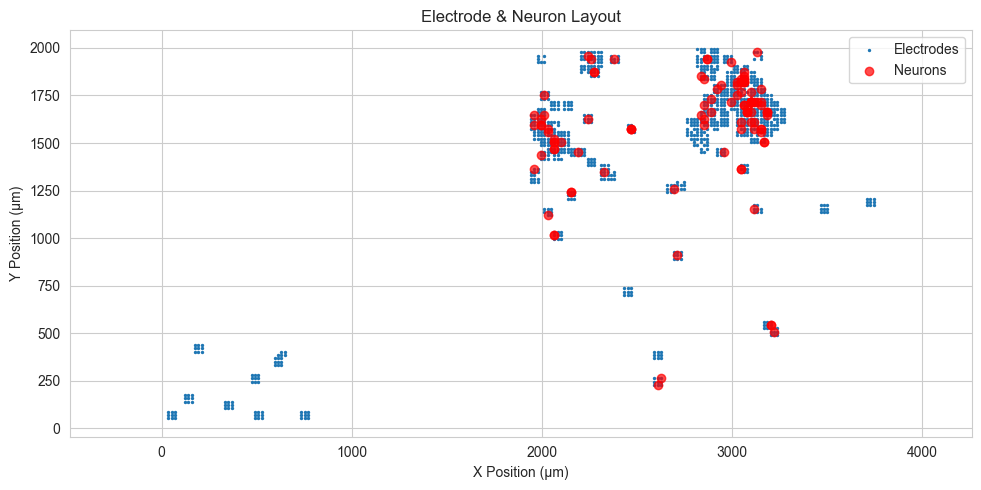

/Users/main_mac/data/org_eval/core/map_utils.py:159: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(decode_pos[:, 0], decode_pos[:, 1], c='g', label='Decode', s=60, marker='o',
/Users/main_mac/data/org_eval/core/map_utils.py:161: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(train_pos[:, 0], train_pos[:, 1], c='purple', label='Training', s=60, marker='s',


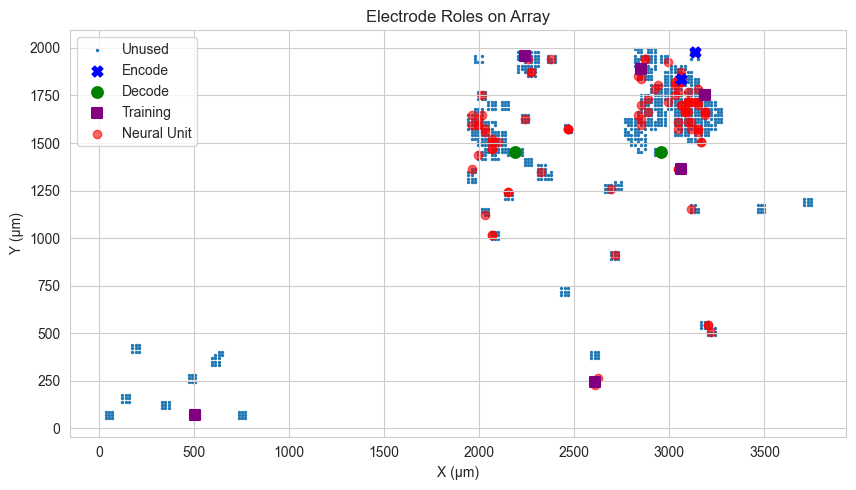

In [21]:
from core.map_utils import plot_electrode_layout, plot_neuron_layout, plot_architecture_map

# Plot all electrode locations
plot_electrode_layout(ole.metadata['mapping'])

# Plot neuron locations overlaid on electrode map
plot_neuron_layout(ole.metadata['mapping'], ole.metadata['spike_locs'])

# Plot architecture roles
plot_architecture_map(ole.metadata)


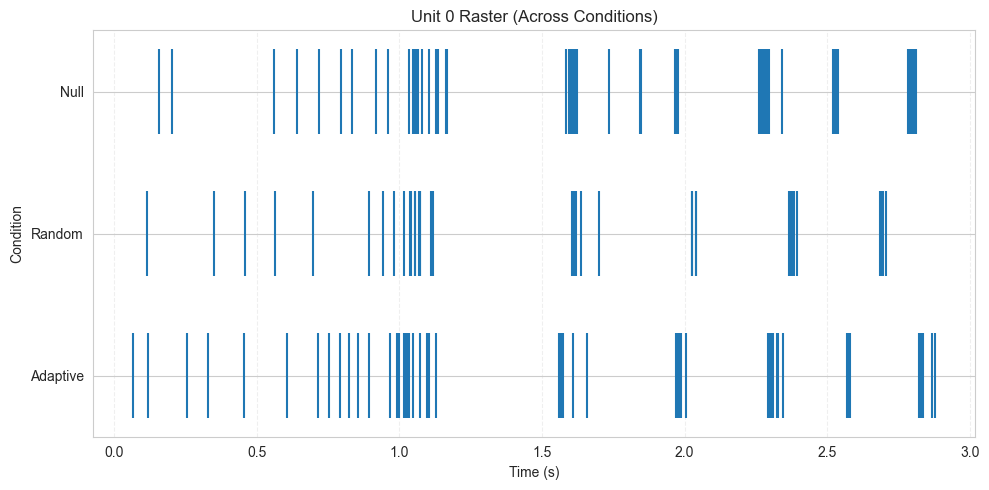

In [16]:
# shows comparative spiking activity of a specific neuron across conditions within the specified time range
ole.show_neuron_raster_comparison(unit_id=0, start_s=0, end_s=3)

In [30]:
ole.log_data["Adaptive"]["log"].head()
ole.log_data["Adaptive"]["pattern"].head()

time  reward stim_indices
0   3.911506    19.0       [4, 3]
1   4.019525    19.0       [4, 3]
2   4.128859    19.0       [4, 3]
3   4.237211    19.0       [4, 3]
4  18.771035    56.0       [6, 5]

/Users/main_mac/data/org_eval/core/map_utils.py:205: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(decode_pos[:, 0], decode_pos[:, 1], c='green', label='Decode', s=60,
/Users/main_mac/data/org_eval/core/map_utils.py:207: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(train_pos[:, 0], train_pos[:, 1], c='purple', label='Training', s=60,


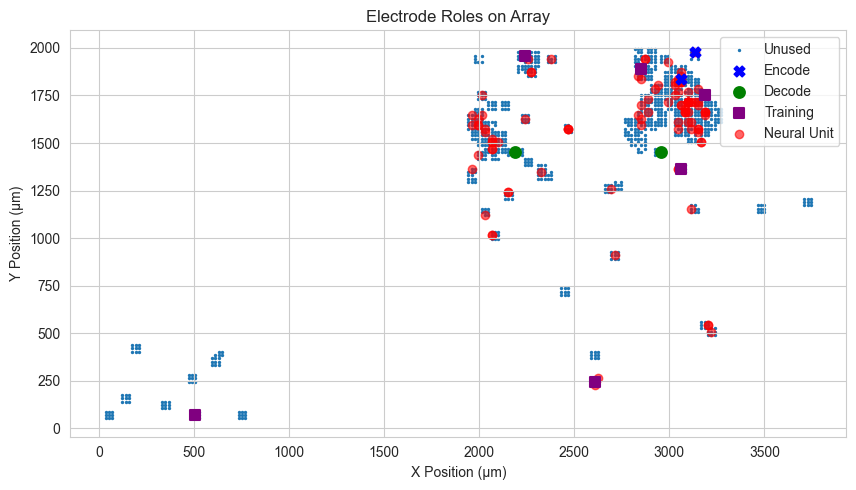

In [31]:
ole.show_combined_electrode_neuron_map()

In [17]:
# Compute latency histograms for all units in all conditions
ole.compute_latency_histograms(window_ms=30, bin_size=5, unit_ids=None)

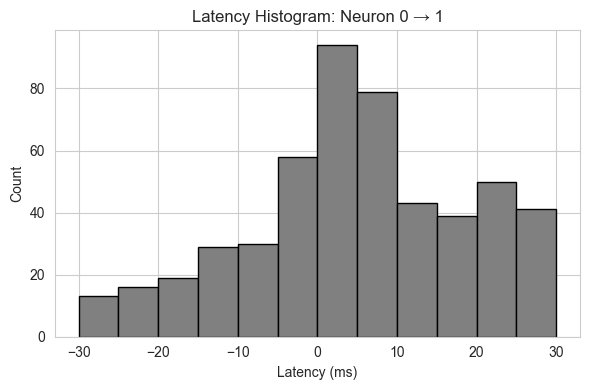

In [18]:
# Show histogram of latencies from unit j to i in a specific condition
ole.show_latency_histogram(condition="Adaptive", i=0, j=1)

In [50]:
# Compute for Adaptive
ole.compute_causal_matrices(
    condition="Adaptive",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)

# Compute for Null
ole.compute_causal_matrices(
    condition="Null",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)

# Compute for Random
ole.compute_causal_matrices(
    condition="Random",
    start_ms=0,
    end_ms=900000,  # 15 minutes
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)


First-Order Weighted Latencies (±15 ms) — Causal Heatmap: Adaptive
  [0, 1] = 4.93 ms
  [0, 2] = 6.19 ms
  [0, 3] = 3.12 ms
  [0, 4] = 4.34 ms
  [0, 5] = 1.46 ms
  [0, 6] = 3.08 ms
  [0, 7] = 1.18 ms
  [0, 8] = 3.21 ms
  [0, 9] = 3.48 ms
  [0, 10] = 3.78 ms
  [0, 11] = 3.23 ms
  [0, 12] = 3.42 ms
  [0, 13] = 3.63 ms
  [0, 14] = 3.38 ms
  [0, 15] = 5.44 ms
  [0, 16] = 2.64 ms
  [0, 17] = 0.02 ms
  [0, 18] = 2.32 ms
  [0, 19] = 0.81 ms
  [0, 20] = 9.04 ms
  [0, 21] = -0.26 ms
  [0, 22] = 2.99 ms
  [0, 23] = 3.75 ms
  [0, 24] = 1.45 ms
  [0, 25] = 1.34 ms
  [0, 26] = 2.99 ms
  [0, 27] = 3.31 ms
  [0, 28] = 0.80 ms
  [0, 29] = 1.53 ms
  [0, 30] = 2.33 ms
  [0, 31] = 1.91 ms
  [0, 32] = 4.45 ms
  [0, 33] = 2.51 ms
  [0, 34] = 2.07 ms
  [0, 35] = 1.99 ms
  [0, 36] = 2.74 ms
  [0, 37] = 4.37 ms
  [0, 38] = 3.87 ms
  [0, 39] = 3.90 ms
  [0, 40] = 2.78 ms
  [0, 41] = 2.76 ms
  [0, 42] = 1.95 ms
  [0, 43] = 2.07 ms
  [0, 44] = 5.80 ms
  [0, 45] = 2.38 ms
  [0, 46] = 1.69 ms
  [0, 47] = 3.18 ms


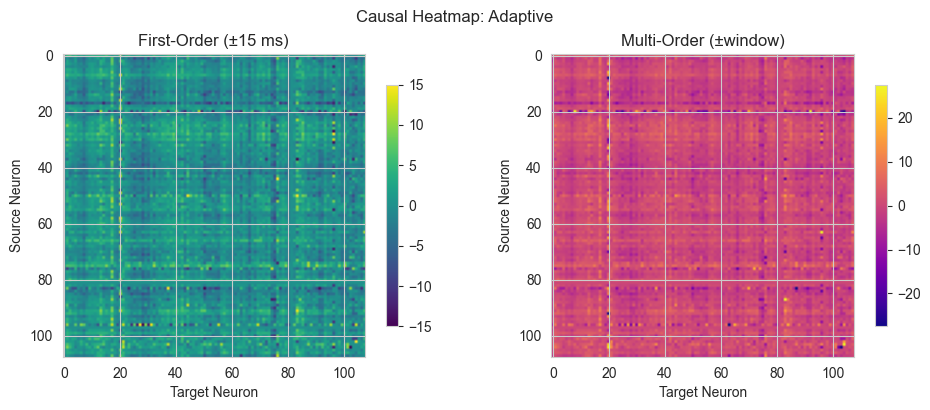


First-Order Weighted Latencies (±15 ms) — Causal Heatmap: Random
  [0, 1] = 6.18 ms
  [0, 2] = 8.97 ms
  [0, 3] = 2.39 ms
  [0, 4] = 4.12 ms
  [0, 5] = 1.02 ms
  [0, 6] = 1.91 ms
  [0, 7] = 0.35 ms
  [0, 8] = 2.70 ms
  [0, 9] = 1.94 ms
  [0, 10] = 1.56 ms
  [0, 11] = 1.57 ms
  [0, 12] = 1.85 ms
  [0, 13] = 3.23 ms
  [0, 14] = 3.51 ms
  [0, 15] = 3.71 ms
  [0, 16] = 1.28 ms
  [0, 17] = -1.38 ms
  [0, 18] = 1.26 ms
  [0, 19] = 0.86 ms
  [0, 20] = -1.80 ms
  [0, 21] = 0.46 ms
  [0, 22] = 2.14 ms
  [0, 23] = 2.63 ms
  [0, 24] = 1.27 ms
  [0, 25] = 4.07 ms
  [0, 26] = 1.19 ms
  [0, 27] = 2.65 ms
  [0, 28] = 0.82 ms
  [0, 29] = 1.17 ms
  [0, 30] = 1.98 ms
  [0, 31] = 1.15 ms
  [0, 32] = 3.65 ms
  [0, 33] = 1.42 ms
  [0, 34] = 1.43 ms
  [0, 35] = 1.47 ms
  [0, 36] = 1.92 ms
  [0, 37] = 3.69 ms
  [0, 38] = 0.92 ms
  [0, 39] = 5.38 ms
  [0, 40] = 2.00 ms
  [0, 41] = 3.05 ms
  [0, 42] = 0.85 ms
  [0, 43] = 3.63 ms
  [0, 44] = 3.46 ms
  [0, 45] = 1.68 ms
  [0, 46] = 1.13 ms
  [0, 47] = 1.70 ms
 

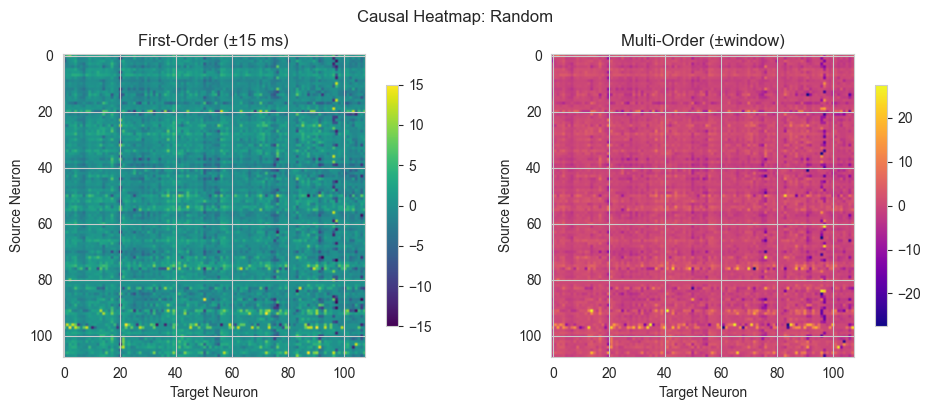


First-Order Weighted Latencies (±15 ms) — Causal Heatmap: Null
  [0, 1] = 5.80 ms
  [0, 2] = 9.24 ms
  [0, 3] = 3.83 ms
  [0, 4] = 5.28 ms
  [0, 5] = 1.84 ms
  [0, 6] = 3.46 ms
  [0, 7] = 0.88 ms
  [0, 8] = 3.47 ms
  [0, 9] = 2.76 ms
  [0, 10] = 2.99 ms
  [0, 11] = 2.21 ms
  [0, 12] = 4.36 ms
  [0, 13] = 3.16 ms
  [0, 14] = 6.03 ms
  [0, 15] = 5.50 ms
  [0, 16] = 2.05 ms
  [0, 17] = 0.67 ms
  [0, 18] = 2.55 ms
  [0, 19] = 1.12 ms
  [0, 20] = -4.24 ms
  [0, 21] = 0.52 ms
  [0, 22] = 2.91 ms
  [0, 23] = 4.00 ms
  [0, 24] = 1.68 ms
  [0, 25] = 2.60 ms
  [0, 26] = 2.38 ms
  [0, 27] = 3.97 ms
  [0, 28] = 1.91 ms
  [0, 29] = 0.90 ms
  [0, 30] = 2.90 ms
  [0, 31] = 1.73 ms
  [0, 32] = 6.27 ms
  [0, 33] = 2.70 ms
  [0, 34] = 3.51 ms
  [0, 35] = 2.83 ms
  [0, 36] = 2.05 ms
  [0, 37] = 4.32 ms
  [0, 38] = 2.23 ms
  [0, 39] = 6.24 ms
  [0, 40] = 2.89 ms
  [0, 41] = 3.15 ms
  [0, 42] = 0.91 ms
  [0, 43] = 4.20 ms
  [0, 44] = 4.97 ms
  [0, 45] = 2.74 ms
  [0, 46] = 1.94 ms
  [0, 47] = 2.64 ms
  [0

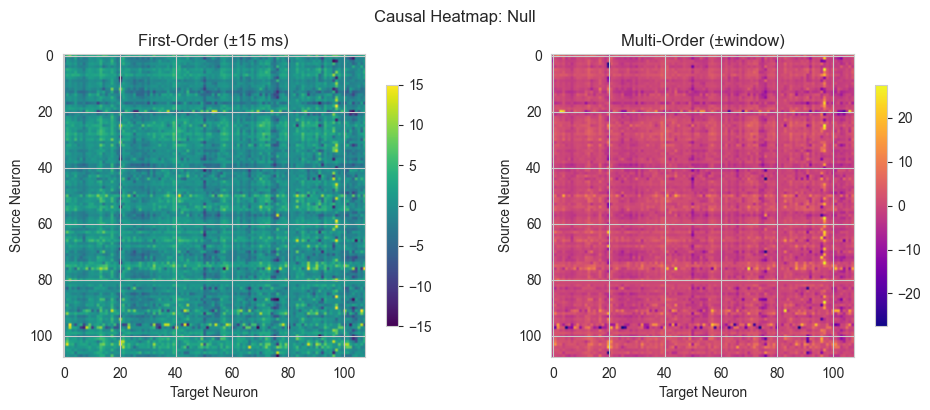

In [51]:
# Show heatmaps for first- and multi-order causal matrices
first, multi = ole.causal_latency_matrices[("Adaptive", 0, 900000)], ole.multi_order_matrices[("Adaptive", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Adaptive", unit_ids=None)

first, multi = ole.causal_latency_matrices[("Random", 0, 900000)], ole.multi_order_matrices[("Random", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Random", unit_ids=None)

first, multi = ole.causal_latency_matrices[("Null", 0, 900000)], ole.multi_order_matrices[("Null", 0, 900000)]
ole.show_causal_plot_from_matrices(first, multi, title="Causal Heatmap: Null", unit_ids=None)

In [52]:
# Compute and cache firing order using the first-order matrix
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Random", label="first_order")
firing_order, net_score = ole.compute_firing_order_from_causal_matrix(first, condition="Null", label="first_order")

In [53]:
# === Get STTC matrix over the same window ===
sd = ole.spike_data["Random"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()

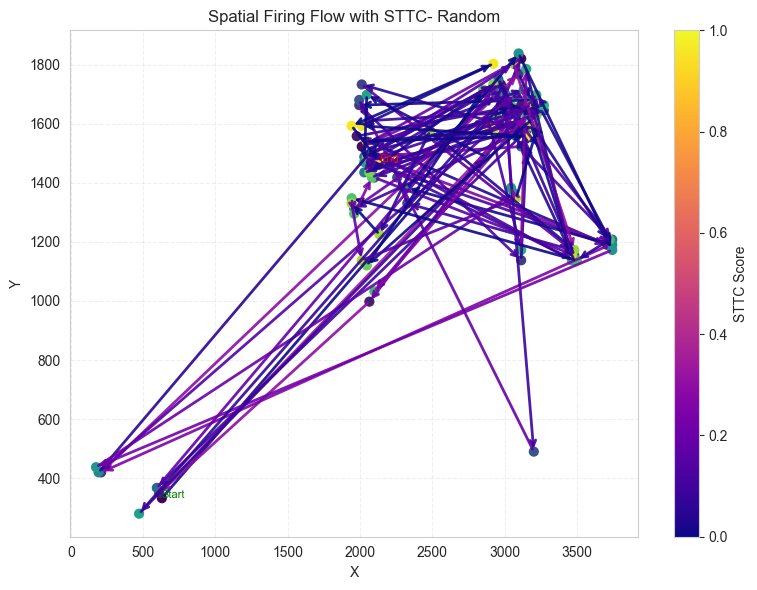

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0             75           74     630.0     332.5    2975.0    1662.5   
1             74           50    2975.0    1662.5    3115.0    1820.0   
2             50           19    3115.0    1820.0    2012.5    1522.5   
3             19           68    2012.5    1522.5    2975.0    1732.5   
4             68            0    2975.0    1732.5    2065.0    1470.0   
..           ...          ...       ...       ...       ...       ...   
102           57           17    2047.5    1540.0    3150.0    1557.5   
103           17           32    3150.0    1557.5    2012.5    1592.5   
104           32           79    2012.5    1592.5    2922.5    1802.5   
105           79           39    2922.5    1802.5    1942.5    1592.5   
106           39           90    1942.5    1592.5    2135.0    1470.0   

     sttc_score  
0       -0.0796  
1        0.1601  
2        0.1965  
3        0.2447  
4        0.1142  
..          ...  
102     -0.0388  
103     -0.0277  
104      0.0262  
105     -0.0016  
106     -0.0113  

[107 rows x 7 columns]

In [22]:
# === Plot spatial arrows with STTC coloring ===
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC- Random",
    arrow_width=0.004
)

In [54]:
sd = ole.spike_data["Null"].subtime(0, 900000)
subset_sd = sd.subset(firing_order)
sttc_matrix = subset_sd.spike_time_tilings()

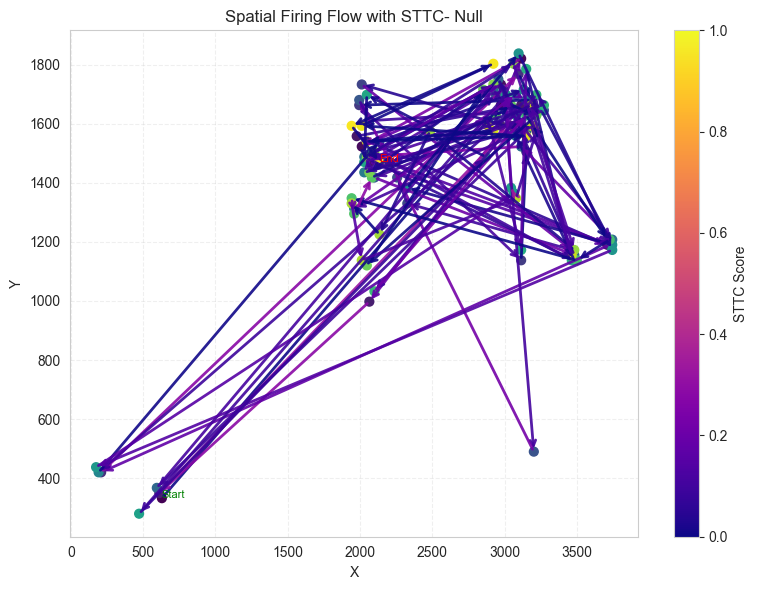

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0             75           74     630.0     332.5    2975.0    1662.5   
1             74           50    2975.0    1662.5    3115.0    1820.0   
2             50           19    3115.0    1820.0    2012.5    1522.5   
3             19           68    2012.5    1522.5    2975.0    1732.5   
4             68            0    2975.0    1732.5    2065.0    1470.0   
..           ...          ...       ...       ...       ...       ...   
102           57           17    2047.5    1540.0    3150.0    1557.5   
103           17           32    3150.0    1557.5    2012.5    1592.5   
104           32           79    2012.5    1592.5    2922.5    1802.5   
105           79           39    2922.5    1802.5    1942.5    1592.5   
106           39           90    1942.5    1592.5    2135.0    1470.0   

     sttc_score  
0       -0.0118  
1        0.1522  
2        0.2488  
3        0.1927  
4        0.1270  
..          ...  
102     -0.0409  
103     -0.0356  
104      0.0058  
105      0.0099  
106      0.0118  

[107 rows x 7 columns]

In [24]:
summary_df = ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix,
    title="Spatial Firing Flow with STTC- Null",
    arrow_width=0.004
)

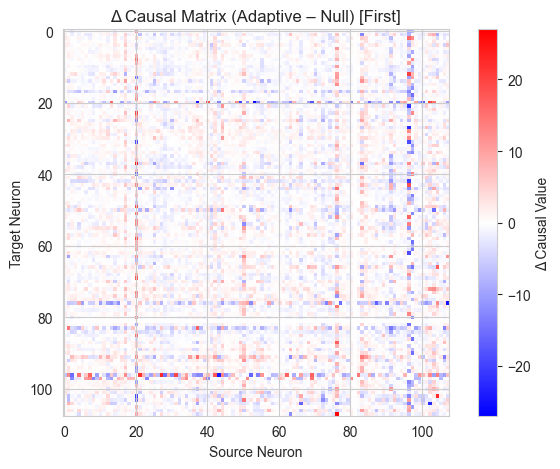

Significant changes (|Δ| ≥ 5 ms): 763 pairs
Summary stats:
mean_diff: 0.0036528267539094254
sum_abs_diff: 19502.15620624995
max_change: 27.0
num_significant_pairs: 763
Significant mask shape: (108, 108)


In [30]:
# === Compare causal matrices between two conditions ===

# Compute Baseline
ole.compute_causal_matrices(
    condition="Null",
    start_ms=0,
    end_ms=900000,
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)

# Compute Adaptive
ole.compute_causal_matrices(
    condition="Adaptive",
    start_ms=0,
    end_ms=900000,
    max_latency_ms=30,
    bin_size=5,
    unit_ids=None
)
# Compare them
diff_matrix, stats, sig_mask = ole.compare_causal_matrices(
    cond_a="Null",
    cond_b="Adaptive",
    time_a=(0, 900000),     # Use actual length here
    time_b=(0, 900000),
    order="first",                # or "multi"
    show_plot=True,
    perform_stats=True, # Will show significant pairs
    alpha=1.0,
    threshold=5 # ms threshold for significant Δ
)

# === View summary stats and significant pairs ===
print("Summary stats:")
for k, v in stats.items():
    print(f"{k}: {v}")

if sig_mask is not None:
    print("Significant mask shape:", sig_mask.shape)


In [33]:
import pandas as pd

# === Segment and compute causal matrices by time bin ===
segmented_latency = {}

for cond in ["Adaptive", "Null", "Random"]:
    segments = ole.segment_and_compute_causal(
        condition=cond,
        bin_size_s=90,          # 1.5-minute segments
        max_latency_ms=30,
        bin_size=5,
        order="first",          # or "multi"
        unit_ids=None           # use all units, or specify a list
    )
    segmented_latency[cond] = segments
    print(f"Computed {len(segments)} segments for '{cond}'")

# === Save segmented results to .pkl as a DataFrame ===
df_segmented_latency = pd.DataFrame([
    {"condition": cond, "start": start, "end": end, "matrix": mat}
    for cond, segs in segmented_latency.items()
    for (start, end, mat) in segs
])

# Ensure the cache folder exists
import os
os.makedirs("latency_analysis_cache", exist_ok=True)

# Save
df_segmented_latency.to_pickle("latency_analysis_cache/segmented_latency.pkl")
print("Saved segmented latency matrices to latency_analysis_cache/segmented_latency.pkl")


Computed 10 segments for 'Adaptive'
Computed 10 segments for 'Null'
Computed 10 segments for 'Random'
Saved segmented latency matrices to latency_analysis_cache/segmented_latency.pkl


In [55]:
# === Segment and compute causal matrices by time bin ===
segments = ole.segment_and_compute_causal(
    condition="Adaptive",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Adaptive'")

segments = ole.segment_and_compute_causal(
    condition="Null",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Null'")

segments = ole.segment_and_compute_causal(
    condition="Random",
    bin_size_s=90,          # 1.5-minute segments
    max_latency_ms=30,
    bin_size=5,
    order="first",          # or "multi"
    unit_ids=None           # use all units, or specify a list
)
print(f"Computed {len(segments)} segments for 'Random'")

# === Save segmented results to .pkl ===
df_segmented_latency = pd.DataFrame([
    {"condition": cond, "start": start, "end": end, "matrix": mat}
    for cond, segs in segmented_latency.items()
    for (start, end, mat) in segs
])

df_segmented_latency.to_pickle("latency_analysis_cache/segmented_latency.pkl")


Computed 10 segments for 'Adaptive'
Computed 10 segments for 'Null'
Computed 10 segments for 'Random'


In [6]:
# === Analyze causal latency and STTC changes over time ===

results = ole.analyze_all_connection_changes(
    bin_size_s=90,                   # Segment length in seconds (to fine tune, try 60 or 180)
    order="first",                   # or "multi" for higher-order latencies
    unit_ids=None,                   # Analyze all units
    min_corr_diff=0.3,               # Δ correlation threshold vs. controls
    baseline_sttc_thresh=0.2,        # Minimum early STTC mean to consider a pair
    zscore_thresh=2.0,               # How extreme must z-scored STTC change be?
    smooth=True,                     # Smooth trajectories before analysis
    smooth_window=3,                 # Size of smoothing filter (in bins)
    conditions=("Adaptive", "Null", "Random")  # Compare Adaptive vs control datasets
)

Segmenting and computing matrices...
Extracting time series...
Analyzing pairs...


/Users/main_mac/data/org_eval/OrgLearningEval.py:853: RuntimeWarning: Mean of empty slice
  mean_ctrl_corr_latency = np.nanmean([v["latency_corr"] for v in control_corrs.values()])


In [9]:
# Create DataFrame + Filter Significant Pairs

import pandas as pd
from IPython.display import display

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Filter only strong/significant pairs
significant_df = df_results[df_results["significant_strengthening"] == True]

# View summary of top results
display(significant_df.sort_values("slope_sttc", ascending=False).head(10))

ole.latency_change_cache["df_results"] = df_results
ole.latency_change_cache["significant_df"] = significant_df

pair  slope_latency  slope_sttc  zscore_peak_latency  \
1151  (32, 90)       0.112404    0.020077             2.087332   
2367  (66, 60)       0.418610    0.014970             2.184533   
53     (2, 70)       1.311362    0.014673             1.543235   
3134  (90, 60)       0.346829    0.013800             1.676791   
2141  (60, 32)       0.157602    0.011276             2.116197   
2394  (67, 90)       1.070522    0.010869             2.084257   
572   (14, 32)       0.502239    0.010361             1.681334   
2605  (73, 32)       0.041319    0.010092             2.076257   
1145  (32, 73)       0.198052    0.010092             2.456738   
1700  (48, 32)       0.184445    0.009919             2.013745   

      zscore_peak_sttc  corr_delta_latency  corr_delta_sttc  wilcoxon_min_p  \
1151          2.624517            0.411546         0.350777        0.019531   
2367          2.399218            1.085664         1.334477        0.019531   
53            2.112537            0.650376         0.741005        0.037109   
3134          2.356182            1.424978         0.876282        0.013672   
2141          2.444120            1.377853         0.860511        0.037109   
2394          2.486593            0.457979         0.328965        0.007812   
572           2.285147            0.995617         0.407533        0.003906   
2605          2.642144            0.859407         0.814604        0.037109   
1145          2.642144            0.684961         0.814604        0.019531   
1700          2.490023            0.418832         0.618370        0.009766   

      significant_strengthening  \
1151                       True   
2367                       True   
53                         True   
3134                       True   
2141                       True   
2394                       True   
572                        True   
2605                       True   
1145                       True   
1700                       True   

                                          control_corrs  
1151  {'Null': {'latency_corr': 0.6163579759891802, ...  
2367  {'Null': {'latency_corr': 0.5008993752879993, ...  
53    {'Null': {'latency_corr': 0.3781612467376313, ...  
3134  {'Null': {'latency_corr': -0.12990858074383643...  
2141  {'Null': {'latency_corr': -0.4558798896753272,...  
2394  {'Null': {'latency_corr': 0.5420205157854174, ...  
572   {'Null': {'latency_corr': -0.7208488606092656,...  
2605  {'Null': {'latency_corr': 0.21418446412373643,...  
1145  {'Null': {'latency_corr': -0.01027023051668990...  
1700  {'Null': {'latency_corr': 0.7417042115519723, ...

In [10]:
# Save results
import os
# Create a subfolder for caching the data
cache_dir = "latency_analysis_cache"
os.makedirs(cache_dir, exist_ok=True)

# Define file paths
results_path = os.path.join(cache_dir, "df_results.pkl")
significant_path = os.path.join(cache_dir, "significant_df.pkl")

# Save to disk
df_results.to_pickle(results_path)
significant_df.to_pickle(significant_path)

print(f"Cached to disk:\n- All results: {results_path}\n- Significant only: {significant_path}")

Cached to disk:
- All results: latency_analysis_cache/df_results.pkl
- Significant only: latency_analysis_cache/significant_df.pkl


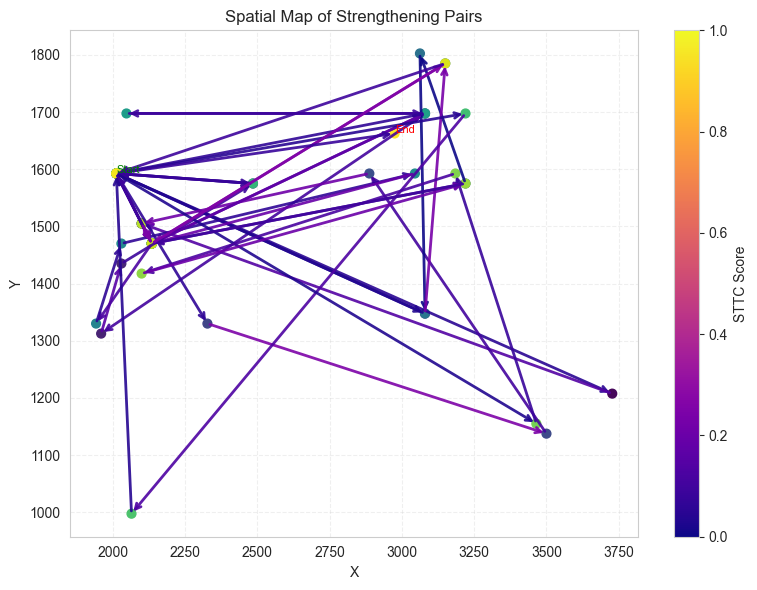

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            32           66    2012.5    1592.5    3727.5    1207.5   
1            66            2    3727.5    1207.5    2100.0    1505.0   
2             2           90    2100.0    1505.0    2135.0    1470.0   
3            90           60    2135.0    1470.0    3080.0    1697.5   
4            60           67    3080.0    1697.5    1960.0    1312.5   
5            67           14    1960.0    1312.5    2030.0    1435.0   
6            14           73    2030.0    1435.0    2485.0    1575.0   
7            73           32    2485.0    1575.0    2012.5    1592.5   
8            32           48    2012.5    1592.5    3080.0    1347.5   
9            48           32    3080.0    1347.5    2012.5    1592.5   
10           32           61    2012.5    1592.5    2327.5    1330.0   
11           61           23    2327.5    1330.0    3500.0    1137.5   
12           23           98    3500.0    1137.5    2887.5    1592.5   
13           98            2    2887.5    1592.5    2100.0    1505.0   
14            2           90    2100.0    1505.0    2135.0    1470.0   
15           90           90    2135.0    1470.0    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           90    2012.5    1592.5    2135.0    1470.0   
18           90           93    2135.0    1470.0    3220.0    1575.0   
19           93           72    3220.0    1575.0    3062.5    1802.5   
20           72           48    3062.5    1802.5    3080.0    1347.5   
21           48           40    3080.0    1347.5    3150.0    1785.0   
22           40           90    3150.0    1785.0    2135.0    1470.0   
23           90           77    2135.0    1470.0    1942.5    1330.0   
24           77           22    1942.5    1330.0    2030.0    1470.0   
25           22           53    2030.0    1470.0    3045.0    1592.5   
26           53           90    3045.0    1592.5    2135.0    1470.0   
27           90           60    2135.0    1470.0    3080.0    1697.5   
28           60           70    3080.0    1697.5    2047.5    1697.5   
29           70           60    2047.5    1697.5    3080.0    1697.5   
30           60           32    3080.0    1697.5    2012.5    1592.5   
31           32           90    2012.5    1592.5    2135.0    1470.0   
32           90           32    2135.0    1470.0    2012.5    1592.5   
33           32           32    2012.5    1592.5    2012.5    1592.5   
34           32           73    2012.5    1592.5    2485.0    1575.0   
35           73           32    2485.0    1575.0    2012.5    1592.5   
36           32           27    2012.5    1592.5    3220.0    1697.5   
37           27           24    3220.0    1697.5    2065.0     997.5   
38           24           32    2065.0     997.5    2012.5    1592.5   
39           32           32    2012.5    1592.5    2012.5    1592.5   
40           32           32    2012.5    1592.5    2012.5    1592.5   
41           32          100    2012.5    1592.5    3465.0    1155.0   
42          100           15    3465.0    1155.0    3185.0    1592.5   
43           15           26    3185.0    1592.5    2100.0    1417.5   
44           26           93    2100.0    1417.5    3220.0    1575.0   
45           93           90    3220.0    1575.0    2135.0    1470.0   
46           90            2    2135.0    1470.0    2100.0    1505.0   
47            2           90    2100.0    1505.0    2135.0    1470.0   
48           90           90    2135.0    1470.0    2135.0    1470.0   
49           90           40    2135.0    1470.0    3150.0    1785.0   
50           40           32    3150.0    1785.0    2012.5    1592.5   
51           32           32    2012.5    1592.5    2012.5    1592.5   
52           32           74    2012.5    1592.5    2975.0    1662.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            32           66    2012.5    1592.5    3727.5    1207.5   
1            66            2    3727.5    1207.5    2100.0    1505.0   
2             2           90    2100.0    1505.0    2135.0    1470.0   
3            90           60    2135.0    1470.0    3080.0    1697.5   
4            60           67    3080.0    1697.5    1960.0    1312.5   
5            67           14    1960.0    1312.5    2030.0    1435.0   
6            14           73    2030.0    1435.0    2485.0    1575.0   
7            73           32    2485.0    1575.0    2012.5    1592.5   
8            32           48    2012.5    1592.5    3080.0    1347.5   
9            48           32    3080.0    1347.5    2012.5    1592.5   
10           32           61    2012.5    1592.5    2327.5    1330.0   
11           61           23    2327.5    1330.0    3500.0    1137.5   
12           23           98    3500.0    1137.5    2887.5    1592.5   
13           98            2    2887.5    1592.5    2100.0    1505.0   
14            2           90    2100.0    1505.0    2135.0    1470.0   
15           90           90    2135.0    1470.0    2135.0    1470.0   
16           90           32    2135.0    1470.0    2012.5    1592.5   
17           32           90    2012.5    1592.5    2135.0    1470.0   
18           90           93    2135.0    1470.0    3220.0    1575.0   
19           93           72    3220.0    1575.0    3062.5    1802.5   
20           72           48    3062.5    1802.5    3080.0    1347.5   
21           48           40    3080.0    1347.5    3150.0    1785.0   
22           40           90    3150.0    1785.0    2135.0    1470.0   
23           90           77    2135.0    1470.0    1942.5    1330.0   
24           77           22    1942.5    1330.0    2030.0    1470.0   
25           22           53    2030.0    1470.0    3045.0    1592.5   
26           53           90    3045.0    1592.5    2135.0    1470.0   
27           90           60    2135.0    1470.0    3080.0    1697.5   
28           60           70    3080.0    1697.5    2047.5    1697.5   
29           70           60    2047.5    1697.5    3080.0    1697.5   
30           60           32    3080.0    1697.5    2012.5    1592.5   
31           32           90    2012.5    1592.5    2135.0    1470.0   
32           90           32    2135.0    1470.0    2012.5    1592.5   
33           32           32    2012.5    1592.5    2012.5    1592.5   
34           32           73    2012.5    1592.5    2485.0    1575.0   
35           73           32    2485.0    1575.0    2012.5    1592.5   
36           32           27    2012.5    1592.5    3220.0    1697.5   
37           27           24    3220.0    1697.5    2065.0     997.5   
38           24           32    2065.0     997.5    2012.5    1592.5   
39           32           32    2012.5    1592.5    2012.5    1592.5   
40           32           32    2012.5    1592.5    2012.5    1592.5   
41           32          100    2012.5    1592.5    3465.0    1155.0   
42          100           15    3465.0    1155.0    3185.0    1592.5   
43           15           26    3185.0    1592.5    2100.0    1417.5   
44           26           93    2100.0    1417.5    3220.0    1575.0   
45           93           90    3220.0    1575.0    2135.0    1470.0   
46           90            2    2135.0    1470.0    2100.0    1505.0   
47            2           90    2100.0    1505.0    2135.0    1470.0   
48           90           90    2135.0    1470.0    2135.0    1470.0   
49           90           40    2135.0    1470.0    3150.0    1785.0   
50           40           32    3150.0    1785.0    2012.5    1592.5   
51           32           32    2012.5    1592.5    2012.5    1592.5   
52           32           74    2012.5    1592.5    2975.0    1662.5   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.2472  
3       0.1713  
4       0.1034  
5       0.160

In [14]:
# Arrow Map of Strengthening Connections--visualize the top significant pairs on a spatial grid to illustrate which regions formed the strongest task-related paths

df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N significant pairs
top_n = 50
top_pairs = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)["pair"].tolist()
firing_order = [p[0] for p in top_pairs] + [p[1] for p in top_pairs]

# Get or compute full-session STTC matrix
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))

# Check if cached
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

if sttc_matrix_adaptive is None:
    print(f"STTC matrix not found for key {adaptive_key}. Computing using spike_time_tilings...")
    sttc_matrix_adaptive = ole.spike_data["Adaptive"].spike_time_tilings(delt=20.0)
    ole.sttc_matrices[adaptive_key] = sttc_matrix_adaptive  # Cache it

ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Strengthening Pairs",
    arrow_width=0.004
)

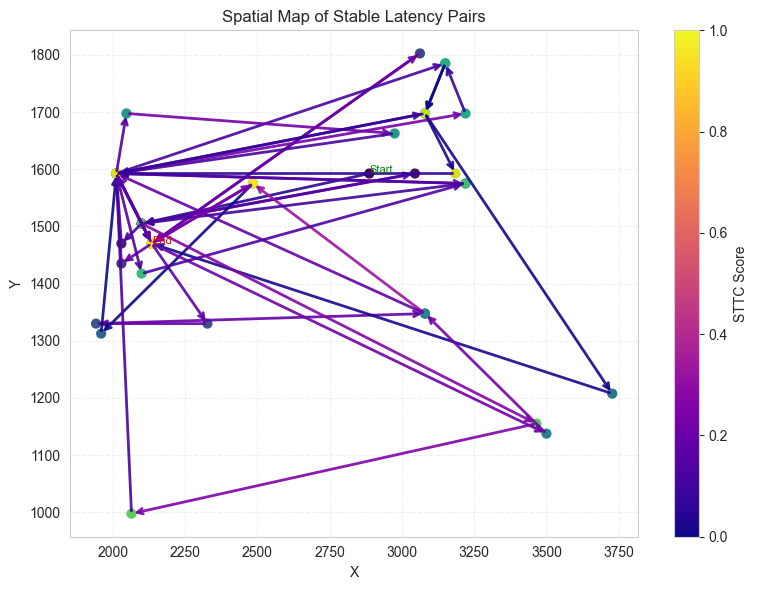

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            98            2    2887.5    1592.5    2100.0    1505.0   
1             2           53    2100.0    1505.0    3045.0    1592.5   
2            53            2    3045.0    1592.5    2100.0    1505.0   
3             2           22    2100.0    1505.0    2030.0    1470.0   
4            22           32    2030.0    1470.0    2012.5    1592.5   
5            32           90    2012.5    1592.5    2135.0    1470.0   
6            90           90    2135.0    1470.0    2135.0    1470.0   
7            90           14    2135.0    1470.0    2030.0    1435.0   
8            14           32    2030.0    1435.0    2012.5    1592.5   
9            32           90    2012.5    1592.5    2135.0    1470.0   
10           90           72    2135.0    1470.0    3062.5    1802.5   
11           72           90    3062.5    1802.5    2135.0    1470.0   
12           90           61    2135.0    1470.0    2327.5    1330.0   
13           61           77    2327.5    1330.0    1942.5    1330.0   
14           77           48    1942.5    1330.0    3080.0    1347.5   
15           48           73    3080.0    1347.5    2485.0    1575.0   
16           73           67    2485.0    1575.0    1960.0    1312.5   
17           67           32    1960.0    1312.5    2012.5    1592.5   
18           32           40    2012.5    1592.5    3150.0    1785.0   
19           40           60    3150.0    1785.0    3080.0    1697.5   
20           60           66    3080.0    1697.5    3727.5    1207.5   
21           66           90    3727.5    1207.5    2135.0    1470.0   
22           90           23    2135.0    1470.0    3500.0    1137.5   
23           23           48    3500.0    1137.5    3080.0    1347.5   
24           48           32    3080.0    1347.5    2012.5    1592.5   
25           32           93    2012.5    1592.5    3220.0    1575.0   
26           93           32    3220.0    1575.0    2012.5    1592.5   
27           32           70    2012.5    1592.5    2047.5    1697.5   
28           70           74    2047.5    1697.5    2975.0    1662.5   
29           74           32    2975.0    1662.5    2012.5    1592.5   
30           32           32    2012.5    1592.5    2012.5    1592.5   
31           32           27    2012.5    1592.5    3220.0    1697.5   
32           27           40    3220.0    1697.5    3150.0    1785.0   
33           40           60    3150.0    1785.0    3080.0    1697.5   
34           60           32    3080.0    1697.5    2012.5    1592.5   
35           32           26    2012.5    1592.5    2100.0    1417.5   
36           26           93    2100.0    1417.5    3220.0    1575.0   
37           93            2    3220.0    1575.0    2100.0    1505.0   
38            2          100    2100.0    1505.0    3465.0    1155.0   
39          100           24    3465.0    1155.0    2065.0     997.5   
40           24           32    2065.0     997.5    2012.5    1592.5   
41           32           32    2012.5    1592.5    2012.5    1592.5   
42           32           32    2012.5    1592.5    2012.5    1592.5   
43           32           90    2012.5    1592.5    2135.0    1470.0   
44           90           90    2135.0    1470.0    2135.0    1470.0   
45           90           90    2135.0    1470.0    2135.0    1470.0   
46           90           32    2135.0    1470.0    2012.5    1592.5   
47           32           60    2012.5    1592.5    3080.0    1697.5   
48           60           15    3080.0    1697.5    3185.0    1592.5   
49           15           32    3185.0    1592.5    2012.5    1592.5   
50           32           90    2012.5    1592.5    2135.0    1470.0   
51           90           73    2135.0    1470.0    2485.0    1575.0   
52           73           90    2485.0    1575.0    2135.0    1470.0   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.1414  
3       0.1140  
4       0.1034  
5       0.160

source_unit  target_unit  source_x  source_y  target_x  target_y  \
0            98            2    2887.5    1592.5    2100.0    1505.0   
1             2           53    2100.0    1505.0    3045.0    1592.5   
2            53            2    3045.0    1592.5    2100.0    1505.0   
3             2           22    2100.0    1505.0    2030.0    1470.0   
4            22           32    2030.0    1470.0    2012.5    1592.5   
5            32           90    2012.5    1592.5    2135.0    1470.0   
6            90           90    2135.0    1470.0    2135.0    1470.0   
7            90           14    2135.0    1470.0    2030.0    1435.0   
8            14           32    2030.0    1435.0    2012.5    1592.5   
9            32           90    2012.5    1592.5    2135.0    1470.0   
10           90           72    2135.0    1470.0    3062.5    1802.5   
11           72           90    3062.5    1802.5    2135.0    1470.0   
12           90           61    2135.0    1470.0    2327.5    1330.0   
13           61           77    2327.5    1330.0    1942.5    1330.0   
14           77           48    1942.5    1330.0    3080.0    1347.5   
15           48           73    3080.0    1347.5    2485.0    1575.0   
16           73           67    2485.0    1575.0    1960.0    1312.5   
17           67           32    1960.0    1312.5    2012.5    1592.5   
18           32           40    2012.5    1592.5    3150.0    1785.0   
19           40           60    3150.0    1785.0    3080.0    1697.5   
20           60           66    3080.0    1697.5    3727.5    1207.5   
21           66           90    3727.5    1207.5    2135.0    1470.0   
22           90           23    2135.0    1470.0    3500.0    1137.5   
23           23           48    3500.0    1137.5    3080.0    1347.5   
24           48           32    3080.0    1347.5    2012.5    1592.5   
25           32           93    2012.5    1592.5    3220.0    1575.0   
26           93           32    3220.0    1575.0    2012.5    1592.5   
27           32           70    2012.5    1592.5    2047.5    1697.5   
28           70           74    2047.5    1697.5    2975.0    1662.5   
29           74           32    2975.0    1662.5    2012.5    1592.5   
30           32           32    2012.5    1592.5    2012.5    1592.5   
31           32           27    2012.5    1592.5    3220.0    1697.5   
32           27           40    3220.0    1697.5    3150.0    1785.0   
33           40           60    3150.0    1785.0    3080.0    1697.5   
34           60           32    3080.0    1697.5    2012.5    1592.5   
35           32           26    2012.5    1592.5    2100.0    1417.5   
36           26           93    2100.0    1417.5    3220.0    1575.0   
37           93            2    3220.0    1575.0    2100.0    1505.0   
38            2          100    2100.0    1505.0    3465.0    1155.0   
39          100           24    3465.0    1155.0    2065.0     997.5   
40           24           32    2065.0     997.5    2012.5    1592.5   
41           32           32    2012.5    1592.5    2012.5    1592.5   
42           32           32    2012.5    1592.5    2012.5    1592.5   
43           32           90    2012.5    1592.5    2135.0    1470.0   
44           90           90    2135.0    1470.0    2135.0    1470.0   
45           90           90    2135.0    1470.0    2135.0    1470.0   
46           90           32    2135.0    1470.0    2012.5    1592.5   
47           32           60    2012.5    1592.5    3080.0    1697.5   
48           60           15    3080.0    1697.5    3185.0    1592.5   
49           15           32    3185.0    1592.5    2012.5    1592.5   
50           32           90    2012.5    1592.5    2135.0    1470.0   
51           90           73    2135.0    1470.0    2485.0    1575.0   
52           73           90    2485.0    1575.0    2135.0    1470.0   

    sttc_score  
0       0.0492  
1       0.1414  
2       0.1414  
3       0.1140  
4       0.1034  
5       0.160

In [15]:
# Generate a spatial map of the most stable latency connections, which are the pairs with the lowest z-score variation and correlation compared to the
# controls (Null and Random conditions). Pearson correlation was used to assess similarity between time series (latency_corr and sttc_corr are Pearson r values
# between Adaptive and each control. Wilcoxon p-values were used separately to test whether Adaptive’s latency distributions differed from the controls.
# A low p-value (< 0.05) indicates a significant distributional shift, regardless of correlation. So "low correlation" in this context refers to Pearson,
# and "significant change" refers to Wilcoxon p-values.

df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Select top N most stable connections based on low z-score variation and low correlation to controls
top_stable = (
    significant_df
    .sort_values(["zscore_peak_latency", "corr_delta_latency"], ascending=[True, False])
    .head(50)
)

# Extract the unique units involved in the top stable pairs
top_stable_pairs = top_stable["pair"].tolist()
firing_order_stable = [p[0] for p in top_stable_pairs] + [p[1] for p in top_stable_pairs]

# Retrieve or compute full-session STTC matrix (already cached in previous cell)
adaptive_key = ("Adaptive", 0, int(ole.spike_data["Adaptive"].length))
sttc_matrix_adaptive = ole.sttc_matrices.get(adaptive_key)

# Plot spatial map
ole.plot_firing_order_spatial_with_sttc(
    firing_order=firing_order_stable,
    sttc_matrix=sttc_matrix_adaptive,
    title="Spatial Map of Stable Latency Pairs",
    arrow_width=0.004
)

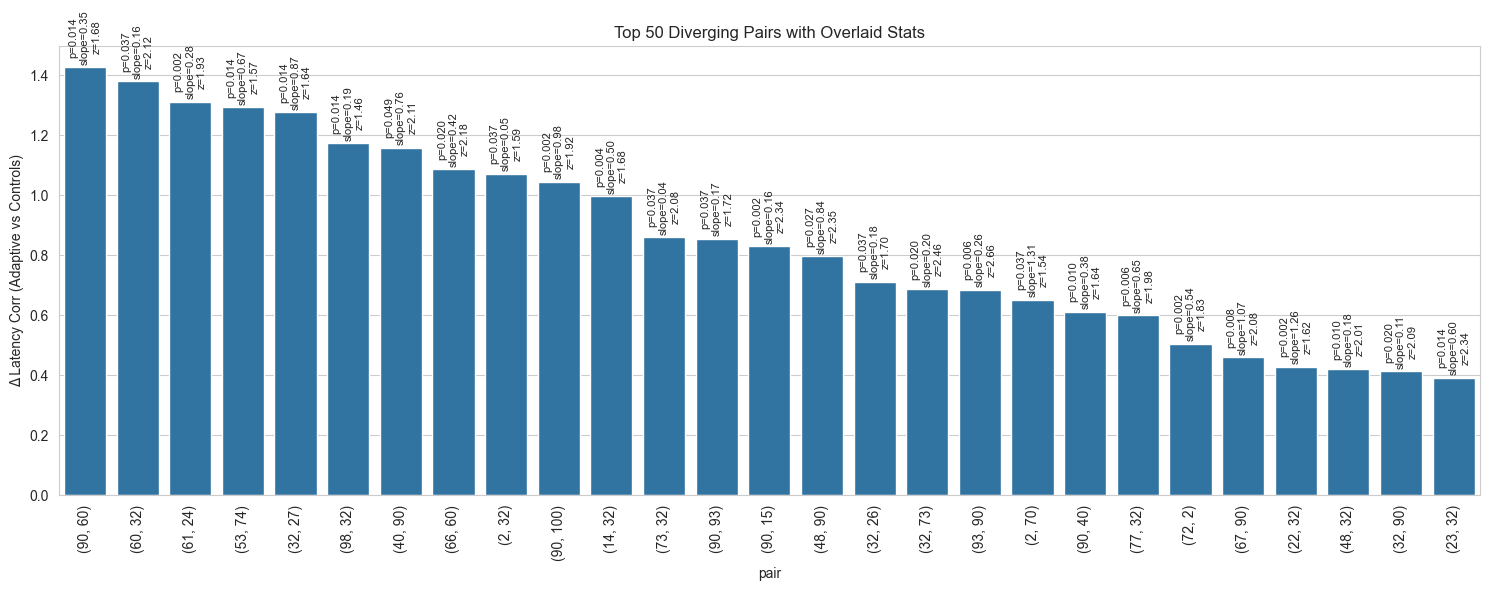

In [17]:
# Bar Plot of Summary Stats--shows all significant pairs sorted by one statistic of interest (e.g., corr_delta_latency). Used to visualize how strongly each pair diverged from Null/Random condition over time.

import seaborn as sns
import matplotlib.pyplot as plt

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Sort and take top 50 by correlation delta (latency)
top_pairs = significant_df.sort_values("corr_delta_latency", ascending=False).head(50)

# Plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_pairs["pair"].astype(str), y=top_pairs["corr_delta_latency"])

# Annotate with other stats
for i, row in top_pairs.reset_index().iterrows():
    annotation = (
        f"p={row['wilcoxon_min_p']:.3f}\n"
        f"slope={row['slope_latency']:.2f}\n"
        f"z={row['zscore_peak_latency']:.2f}"
    )
    ax.text(i, row["corr_delta_latency"] + 0.01, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Δ Latency Corr (Adaptive vs Controls)")
plt.title("Top 50 Diverging Pairs with Overlaid Stats")
plt.tight_layout()
plt.show()

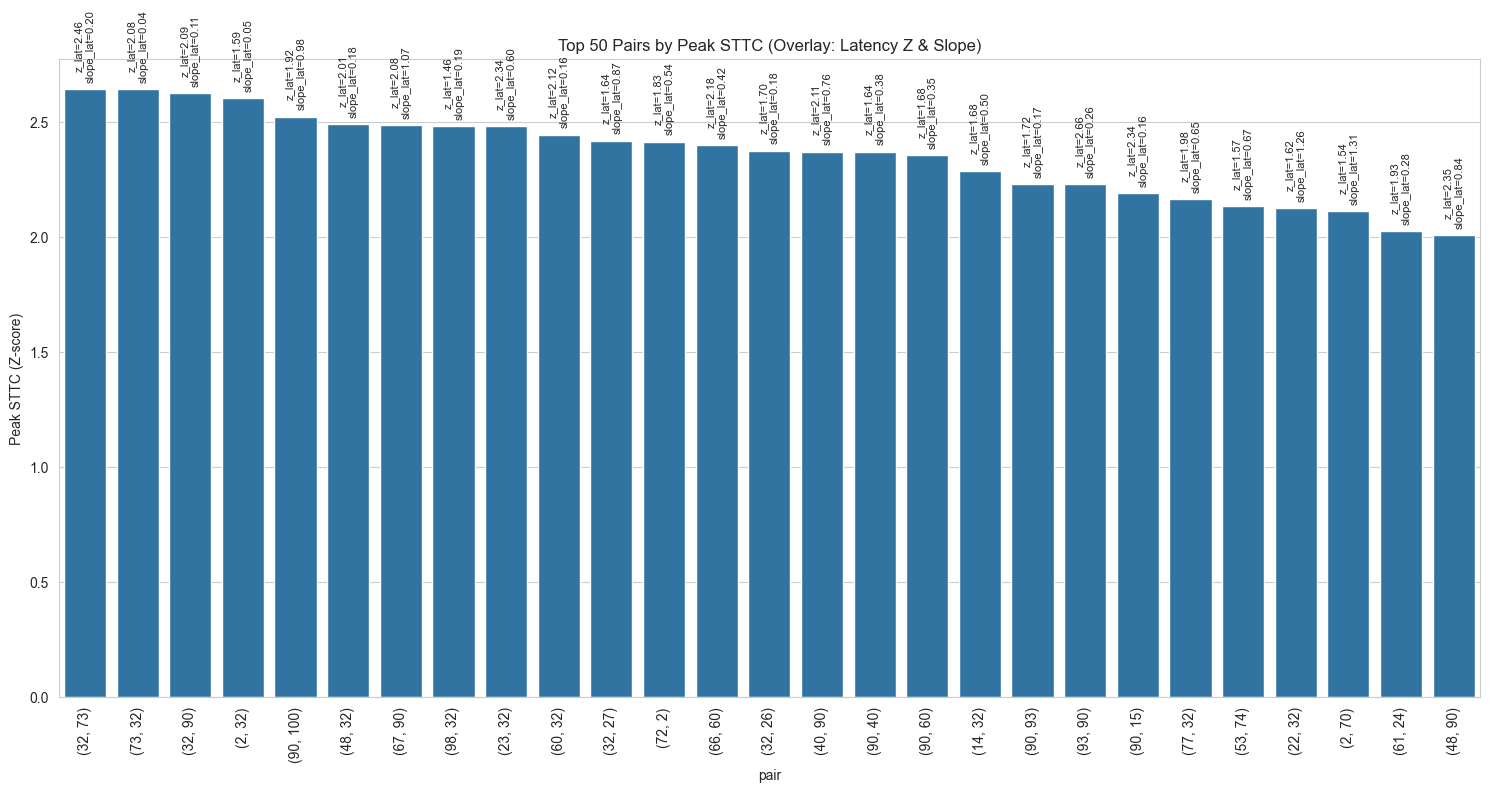

In [27]:
# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# --- Peak STTC plot (zscore) ---
plt.figure(figsize=(15, 8))
top_by_sttc_peak = significant_df.sort_values("zscore_peak_sttc", ascending=False).head(50)

ax = sns.barplot(x=top_by_sttc_peak["pair"].astype(str), y=top_by_sttc_peak["zscore_peak_sttc"])

# Overlay zscore_peak_latency and slope_latency
for i, row in top_by_sttc_peak.reset_index().iterrows():
    annotation = (
        f"z_lat={row['zscore_peak_latency']:.2f}\n"
        f"slope_lat={row['slope_latency']:.2f}"
    )
    ax.text(i, row["zscore_peak_sttc"] + 0.03, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("Peak STTC (Z-score)")
plt.title("Top 50 Pairs by Peak STTC (Overlay: Latency Z & Slope)")
plt.subplots_adjust(top=1.00)  # Adjust top spacing (1.0 = top of figure)
plt.tight_layout()
plt.show()


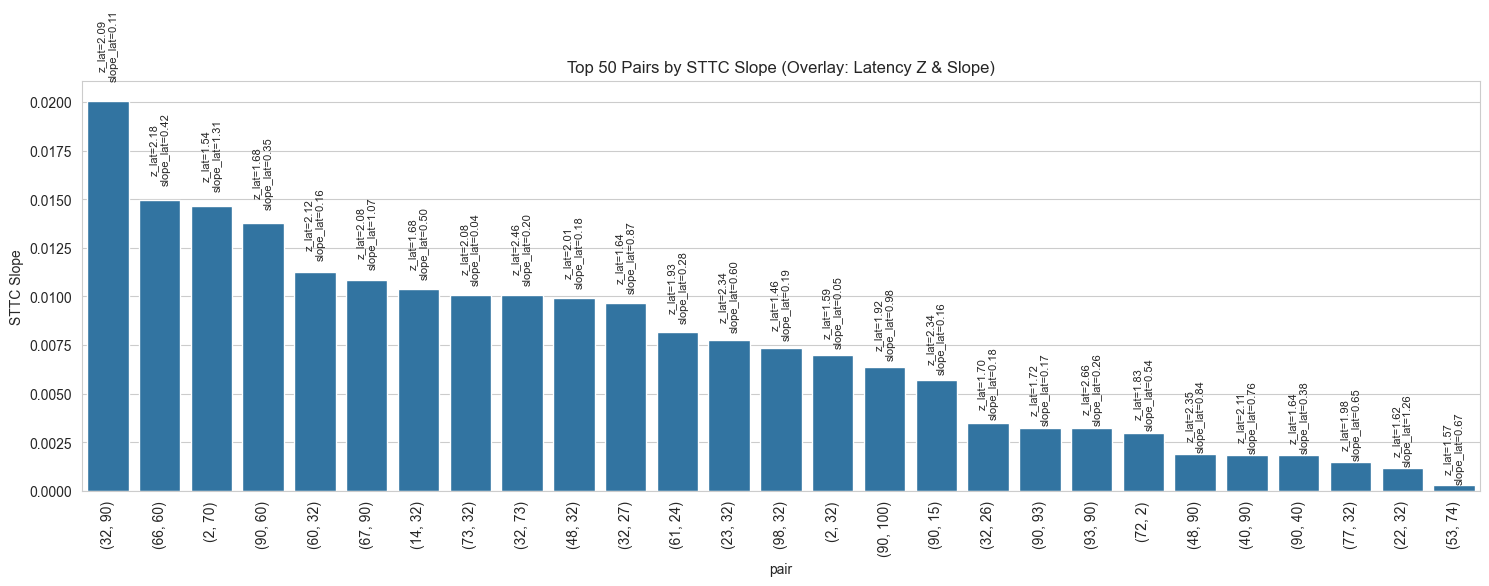

In [31]:
# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# --- STTC slope plot ---
plt.figure(figsize=(15, 6))
top_by_sttc_slope = significant_df.sort_values("slope_sttc", ascending=False).head(50)
ax = sns.barplot(x=top_by_sttc_slope["pair"].astype(str), y=top_by_sttc_slope["slope_sttc"])

# Overlay zscore_peak_latency and slope_latency
for i, row in top_by_sttc_slope.reset_index().iterrows():
    # Use dynamic offset (5% of the bar height)
    offset = 0.05 * row["slope_sttc"]
    annotation = (
        f"z_lat={row['zscore_peak_latency']:.2f}\n"
        f"slope_lat={row['slope_latency']:.2f}"
    )
    ax.text(i, row["slope_sttc"] + offset, annotation,
            ha='center', va='bottom', fontsize=8, rotation=90)

plt.xticks(rotation=90)
plt.ylabel("STTC Slope")
plt.title("Top 50 Pairs by STTC Slope (Overlay: Latency Z & Slope)")
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Move title higher
plt.show()


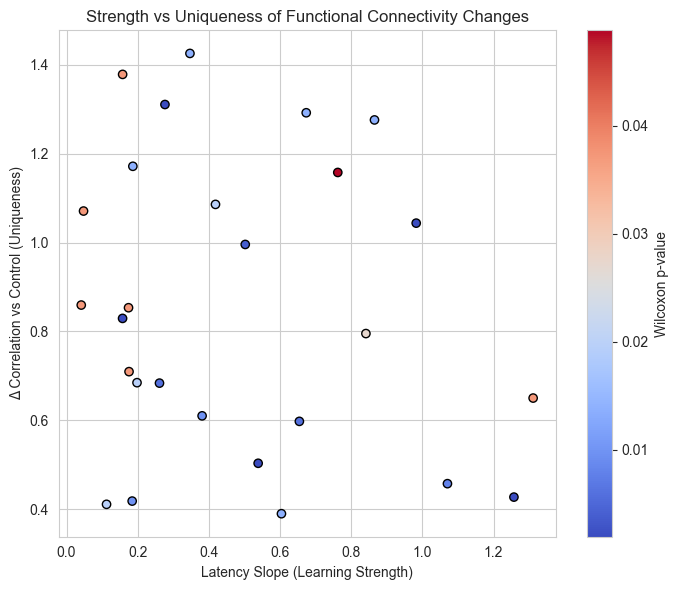

In [21]:
# Scatter Plot: Strength vs Divergence. Showcase which connections are strong, unique, and significant. Configure map by choosing the following:
# X-axis: slope_latency or slope_sttc
# Y-axis: corr_delta_latency or corr_delta_sttc
# Color: wilcoxon_min_p or zscore_peak_sttc

# --- Scatter Plot: Strength vs Divergence ---

import matplotlib.pyplot as plt
import pandas as pd

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Use top N significant pairs (optional)
top_n = 100
top_df = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)

# Scatter plot
plt.figure(figsize=(7, 6))
sc = plt.scatter(
    top_df["slope_latency"],
    top_df["corr_delta_latency"],
    c=top_df["wilcoxon_min_p"],
    cmap="coolwarm",
    edgecolor="black"
)
plt.xlabel("Latency Slope (Learning Strength)")
plt.ylabel("Δ Correlation vs Control (Uniqueness)")
plt.colorbar(sc, label="Wilcoxon p-value")
plt.title("Strength vs Uniqueness of Functional Connectivity Changes")
plt.tight_layout()
plt.show()

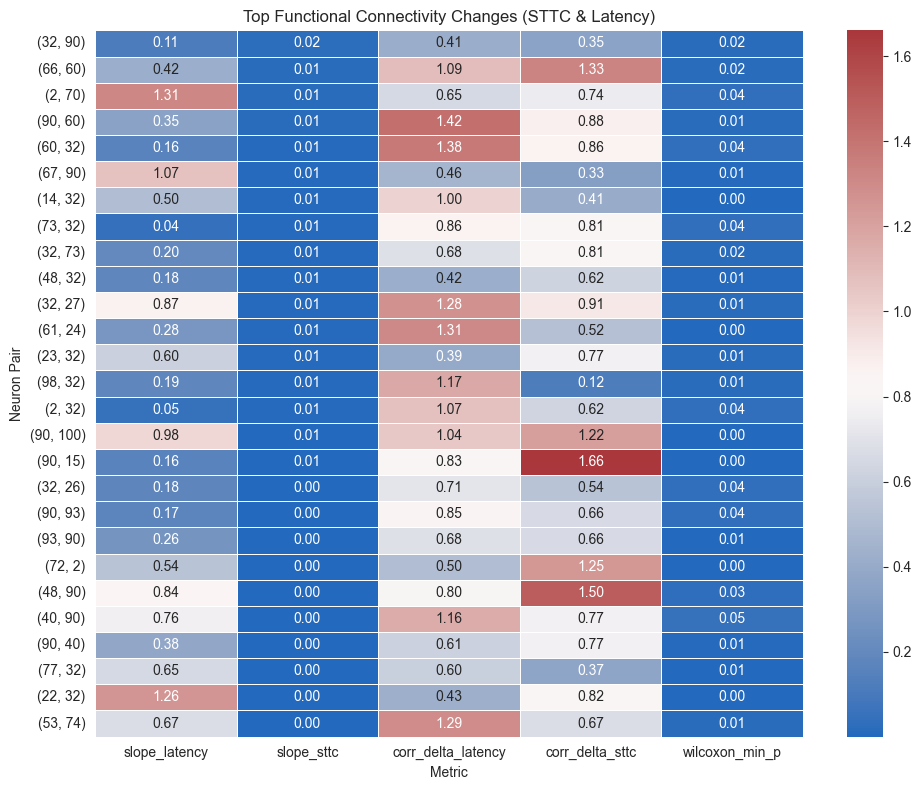

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load cached results
df_results = pd.read_pickle("latency_analysis_cache/df_results.pkl")
significant_df = pd.read_pickle("latency_analysis_cache/significant_df.pkl")

# Use top N significant pairs
top_n = 50
top_df = significant_df.sort_values("slope_sttc", ascending=False).head(top_n)

# Prepare data for heatmap
heatmap_data = top_df.set_index("pair")[[
    "slope_latency",
    "slope_sttc",
    "corr_delta_latency",
    "corr_delta_sttc",
    "wilcoxon_min_p"
]]

# Optional: normalize each column for better visual contrast
# heatmap_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Top Functional Connectivity Changes (STTC & Latency)")
plt.xlabel("Metric")
plt.ylabel("Neuron Pair")
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
from scipy.stats import spearmanr
import os

# Load segmented latency matrices
segmented_path = "latency_analysis_cache/segmented_latency.pkl"
df_segmented_latency = pd.read_pickle(segmented_path)

# Organize into dict: {condition: [(start, matrix)]}
latency_by_condition = {}
for _, row in df_segmented_latency.iterrows():
    cond = row["condition"]
    if cond not in latency_by_condition:
        latency_by_condition[cond] = []
    latency_by_condition[cond].append((row["start"], row["matrix"]))

# Ensure all conditions have aligned bins
bins = sorted(set(start for start, _ in latency_by_condition["Adaptive"]))

# Calculate Spearman correlations
results = []
for start in bins:
    mat_ad = dict(latency_by_condition["Adaptive"])[start].flatten()
    for ctrl in ["Null", "Random"]:
        mat_ctrl = dict(latency_by_condition[ctrl])[start].flatten()
        corr, _ = spearmanr(mat_ad, mat_ctrl)
        results.append({
            "time_bin_start": start,
            "comparison": f"Adaptive vs {ctrl}",
            "spearman_corr": corr
        })

# Create DataFrame and save
df_rank_corr = pd.DataFrame(results)

# Ensure output directory exists
os.makedirs("latency_analysis_cache", exist_ok=True)
df_rank_corr.to_pickle("latency_analysis_cache/rank_order_correlation.pkl")

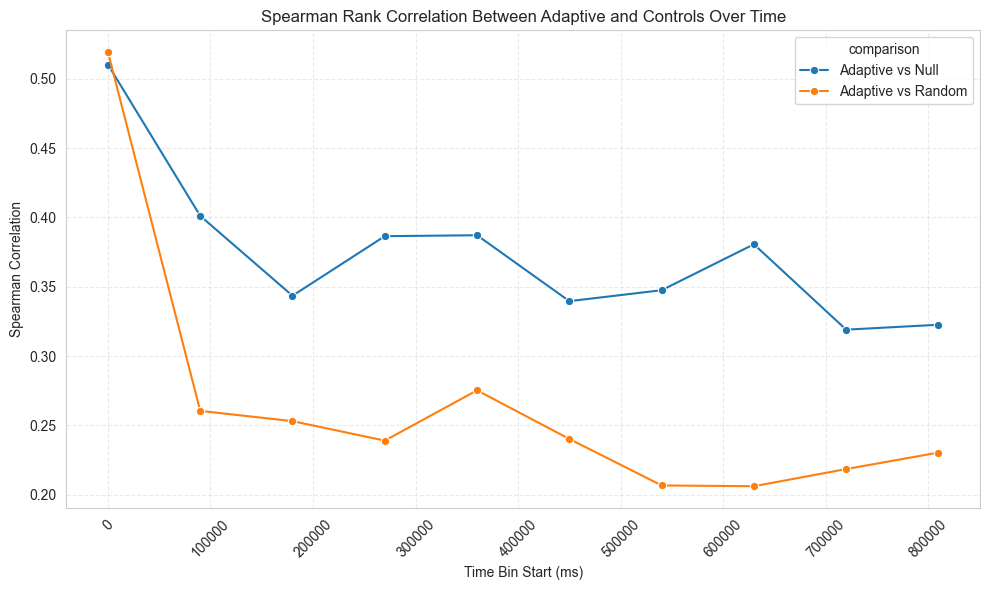

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load computed correlation results
df_rank_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")

# Plot with lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_rank_corr,
    x="time_bin_start",
    y="spearman_corr",
    hue="comparison",
    marker="o"
)
plt.title("Spearman Rank Correlation Between Adaptive and Controls Over Time")
plt.xlabel("Time Bin Start (ms)")
plt.ylabel("Spearman Correlation")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [42]:
df_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")
print("Columns in rank-order correlation DataFrame:")
print(df_corr.columns)
display(df_corr.head())

Columns in rank-order correlation DataFrame:
Index(['time_bin_start', 'comparison', 'spearman_corr'], dtype='object')


time_bin_start          comparison  spearman_corr
0               0    Adaptive vs Null       0.510413
1               0  Adaptive vs Random       0.519361
2           90000    Adaptive vs Null       0.401165
3           90000  Adaptive vs Random       0.260396
4          180000    Adaptive vs Null       0.343517

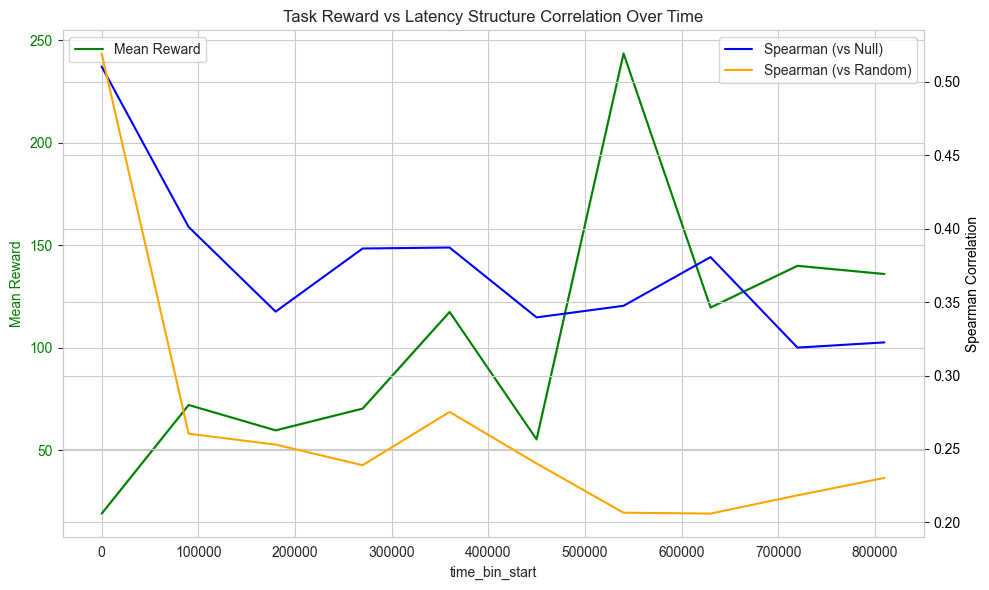

In [43]:
# Overlay of task performance with functional connectivity dynamics.

# Load the Spearman rank correlations from the .pkl file
# Load the smoothed Adaptive reward data
# Normalize and align the reward timeline to match latency bin time windows
# Overlay both trends (correlation vs control and reward performance) for visual comparison

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load correlation results ===
df_corr = pd.read_pickle("latency_analysis_cache/rank_order_correlation.pkl")

# === Load reward data for Adaptive ===
reward_df = ole.get_reward_df("Adaptive").copy()
reward_df["time_ms"] = reward_df["time"] * 1000  # convert to ms

# === Create time bins from correlation DataFrame ===
bin_edges = sorted(df_corr["time_bin_start"].unique())
reward_df["bin_start"] = pd.cut(
    reward_df["time_ms"],
    bins=[-1] + bin_edges[1:] + [reward_df["time_ms"].max()],
    labels=bin_edges,
    include_lowest=True
).astype(float)

# === Mean reward per bin ===
binned_reward = reward_df.groupby("bin_start")["reward"].mean().reset_index()
binned_reward.columns = ["time_bin_start", "mean_reward"]

# === Merge with correlation results ===
merged = df_corr.merge(binned_reward, on="time_bin_start", how="left")

# === Plot ===
plt.figure(figsize=(10, 6))

# Plot reward curve
ax1 = sns.lineplot(data=merged, x="time_bin_start", y="mean_reward", color="green", label="Mean Reward")
ax1.set_ylabel("Mean Reward", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Create second axis
ax2 = ax1.twinx()
sns.lineplot(data=merged[merged["comparison"] == "Adaptive vs Null"], x="time_bin_start", y="spearman_corr",
             ax=ax2, color="blue", label="Spearman (vs Null)")
sns.lineplot(data=merged[merged["comparison"] == "Adaptive vs Random"], x="time_bin_start", y="spearman_corr",
             ax=ax2, color="orange", label="Spearman (vs Random)")
ax2.set_ylabel("Spearman Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

plt.title("Task Reward vs Latency Structure Correlation Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

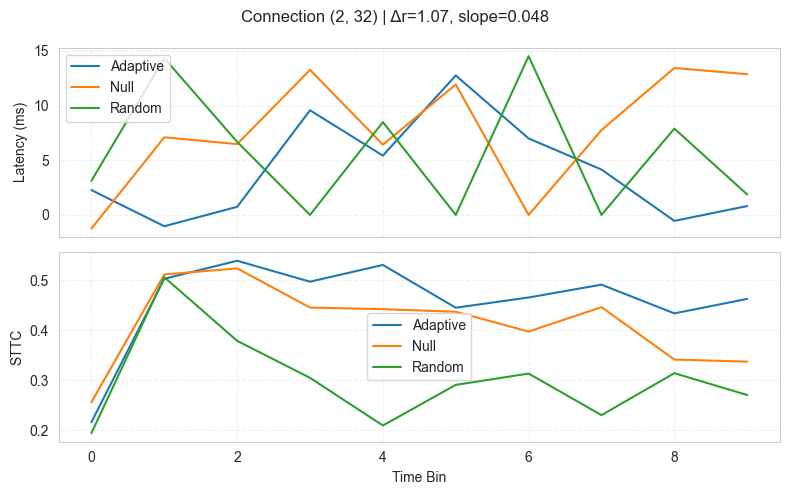

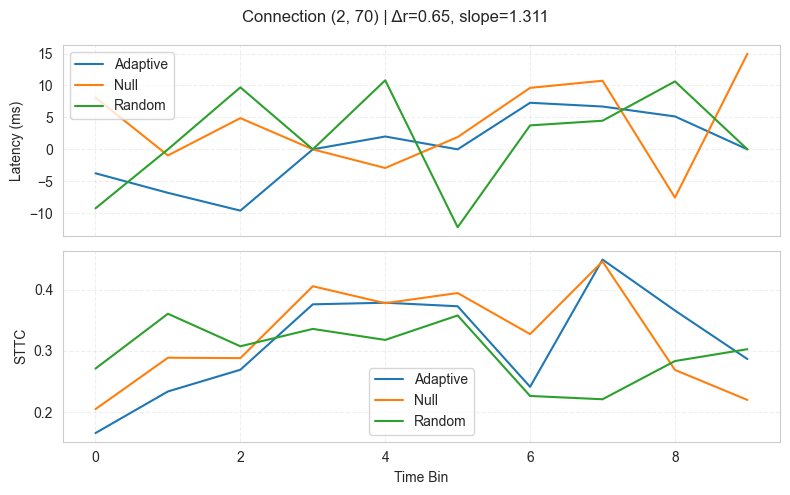

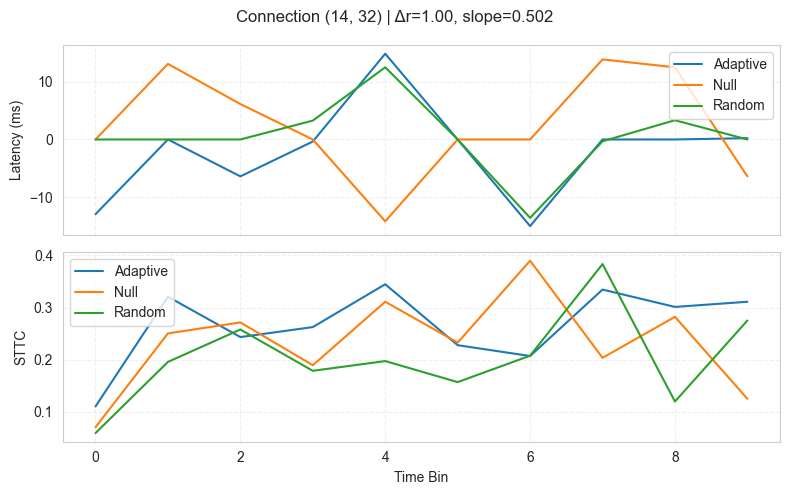

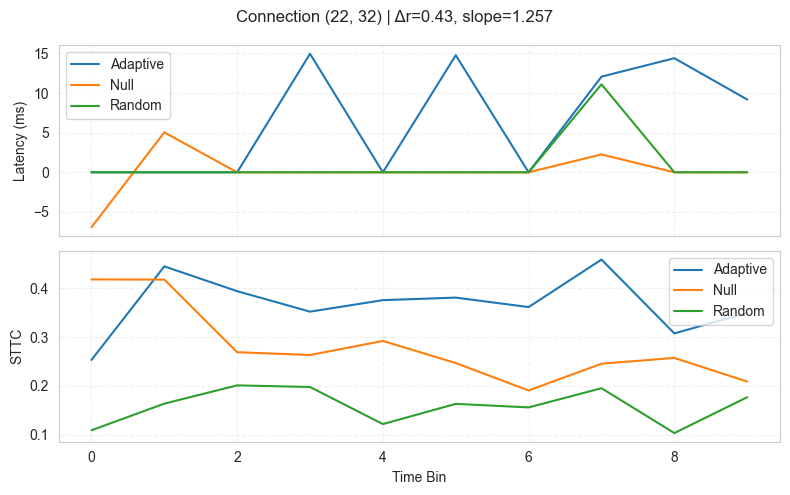

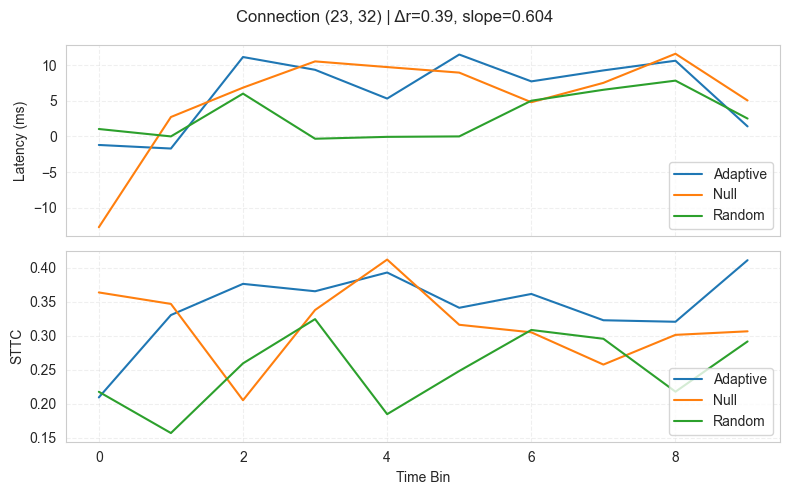

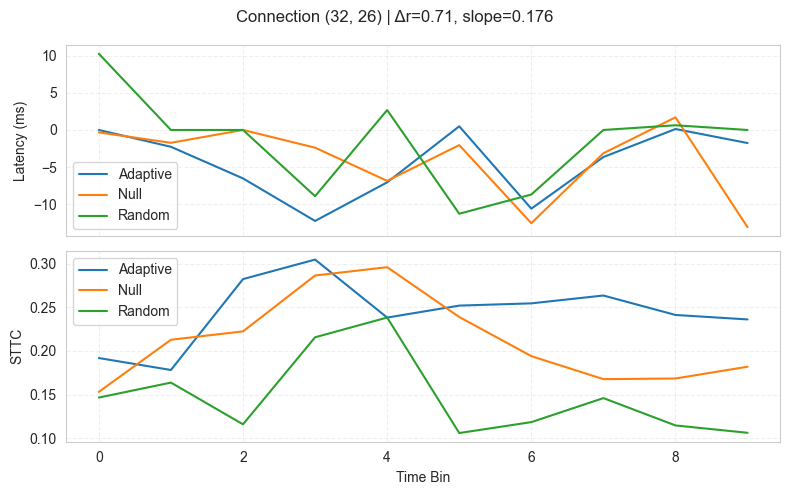

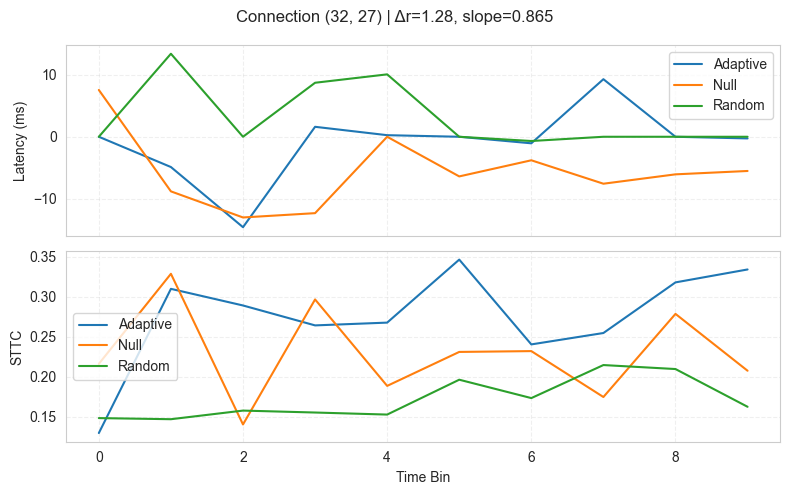

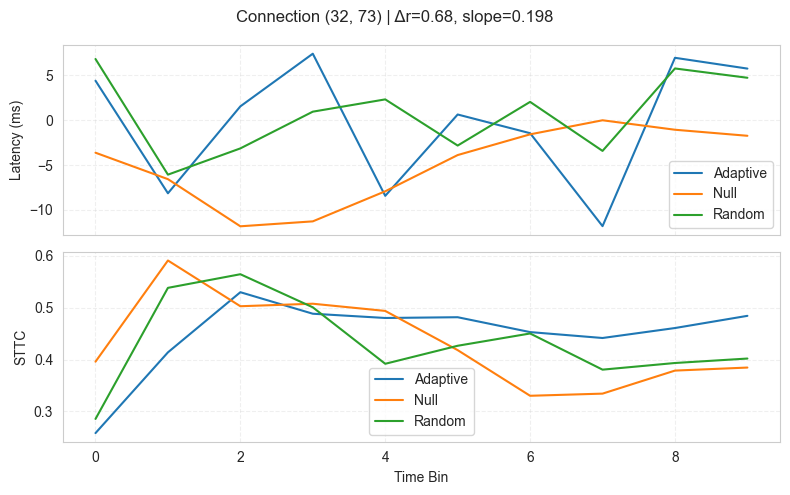

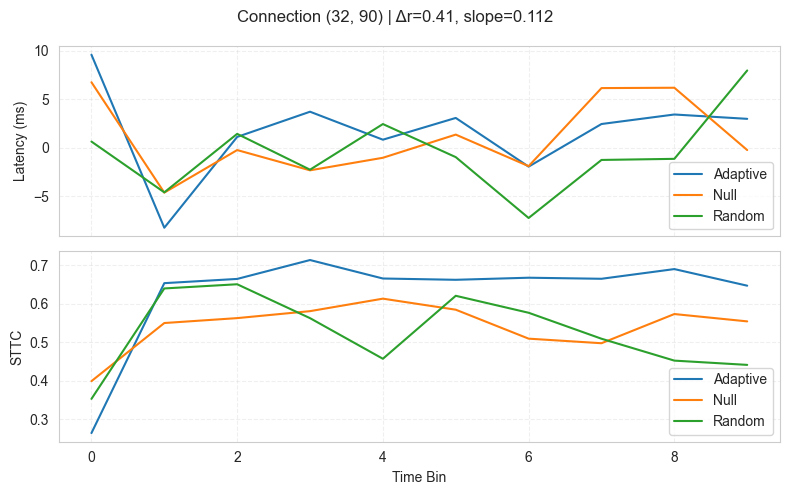

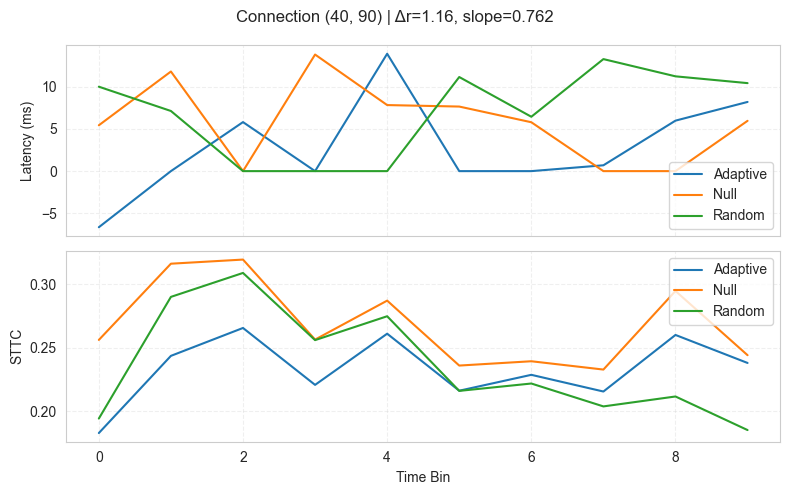

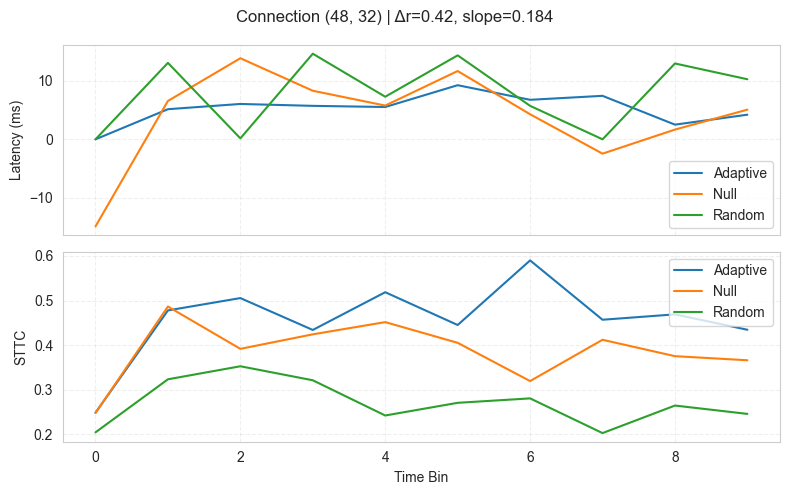

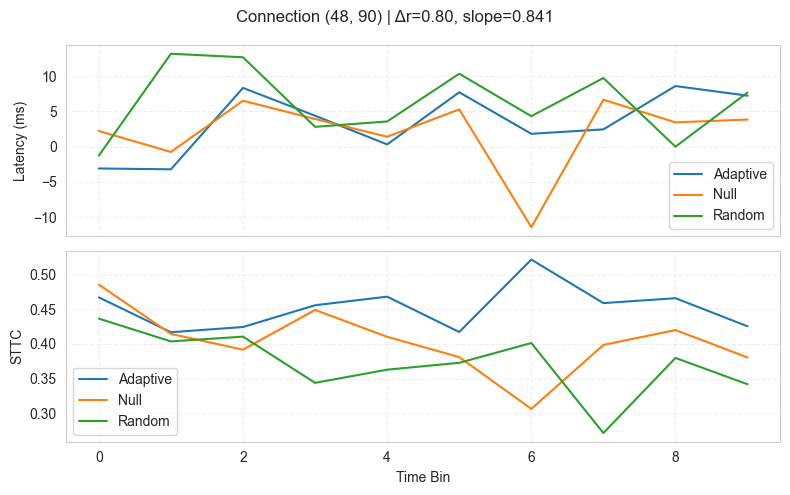

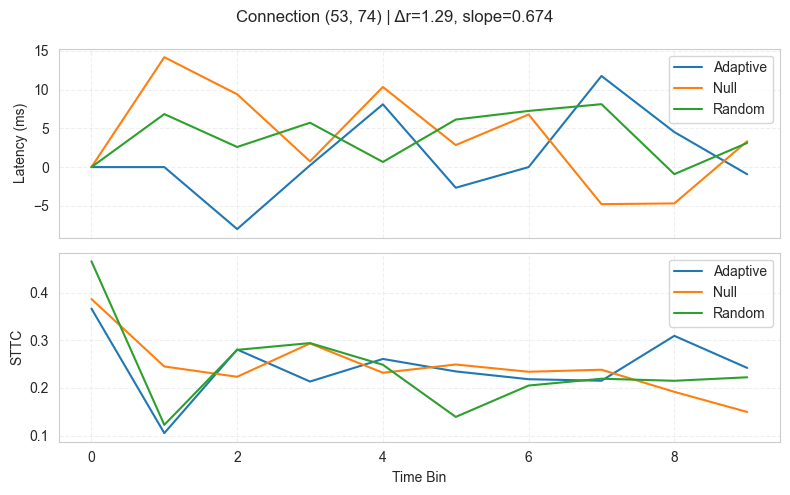

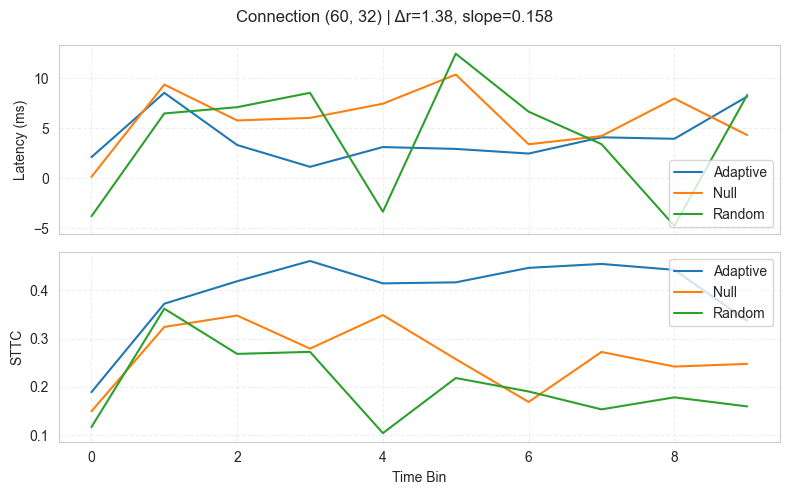

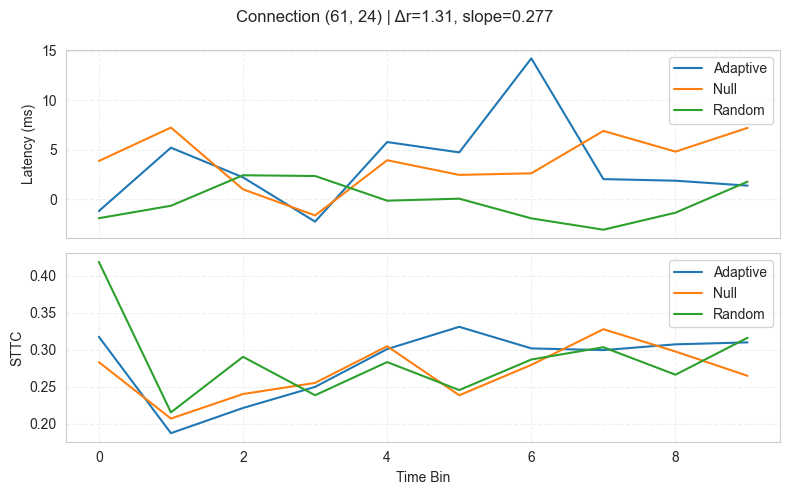

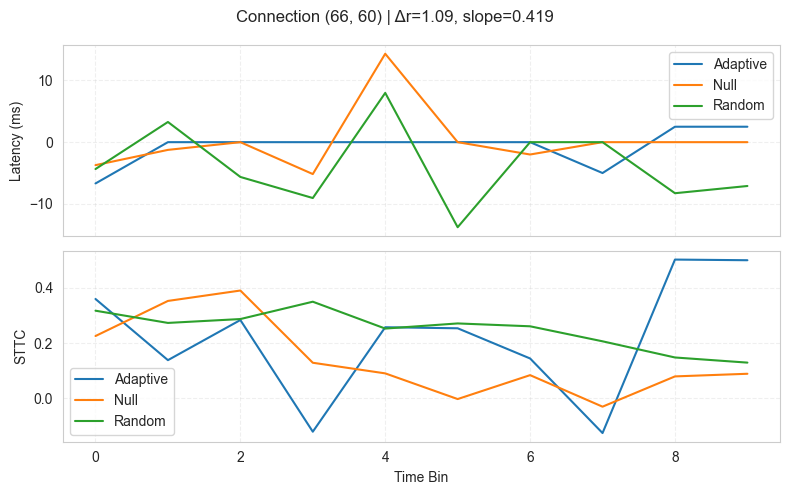

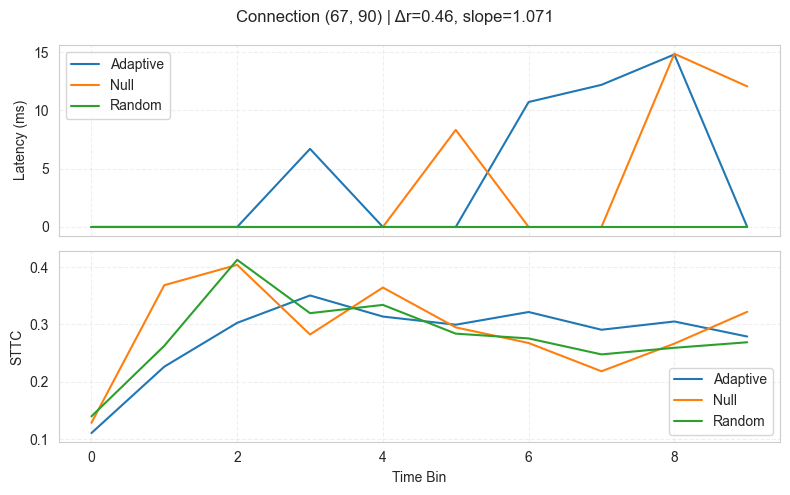

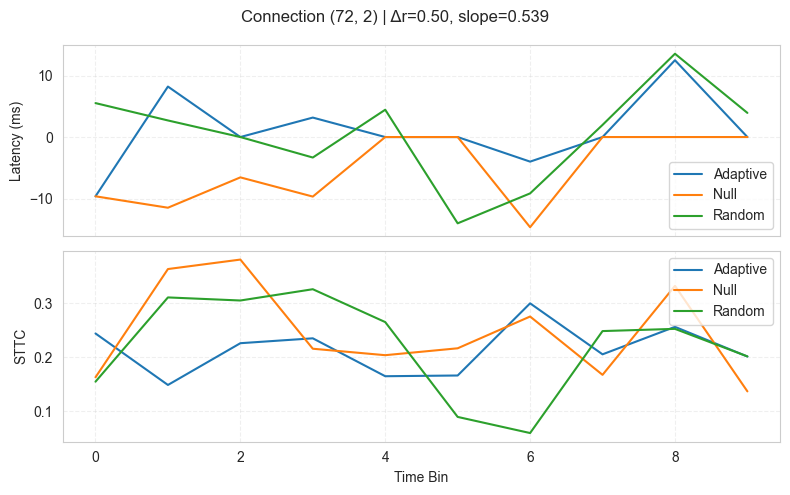

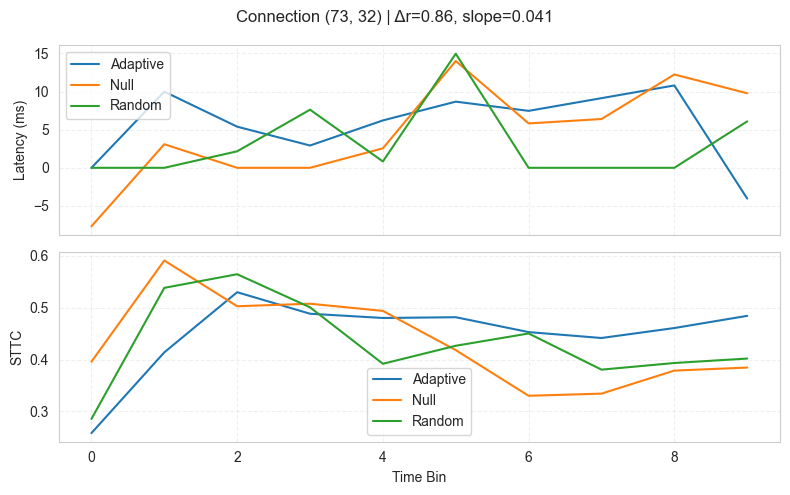

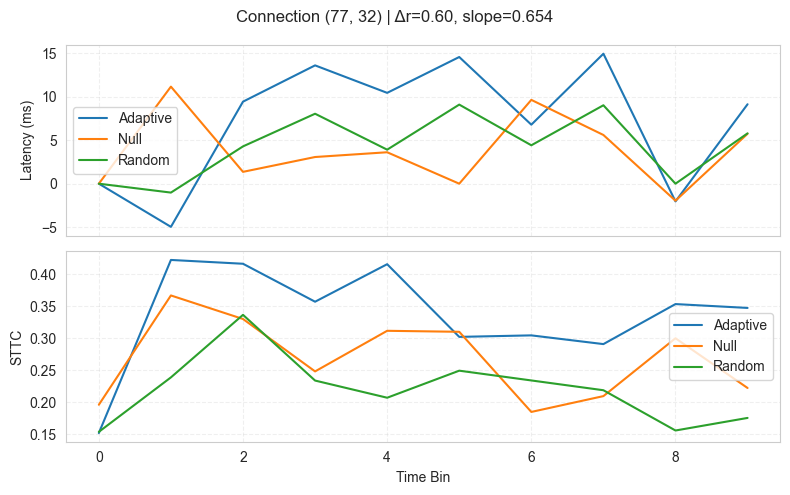

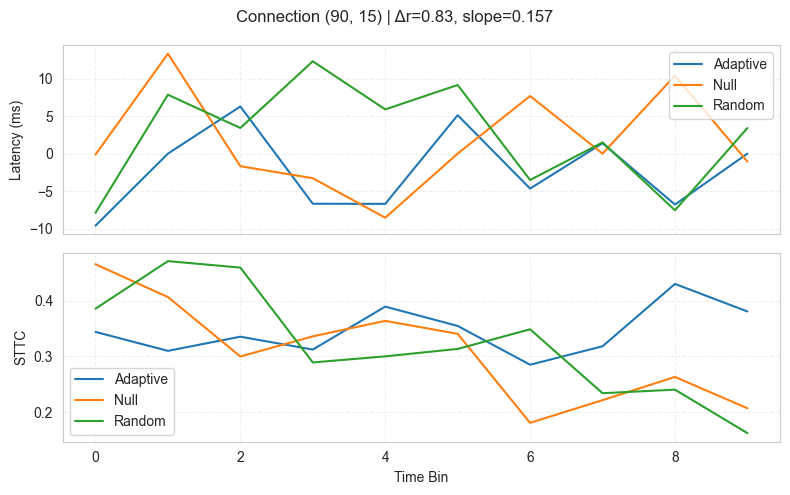

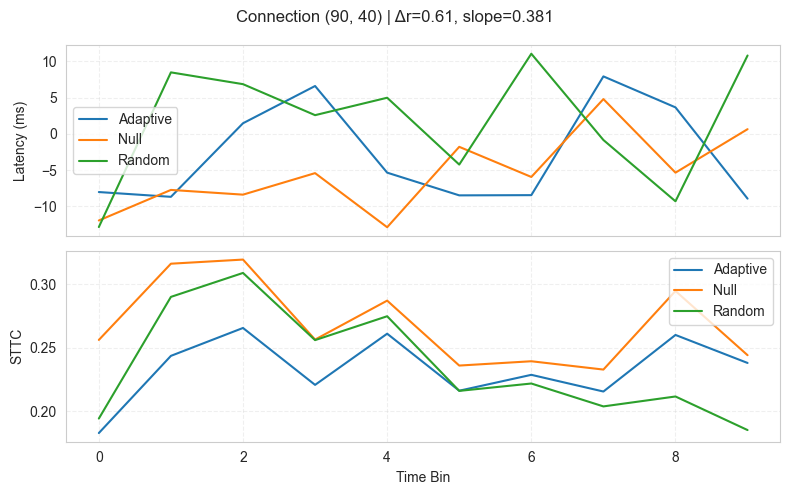

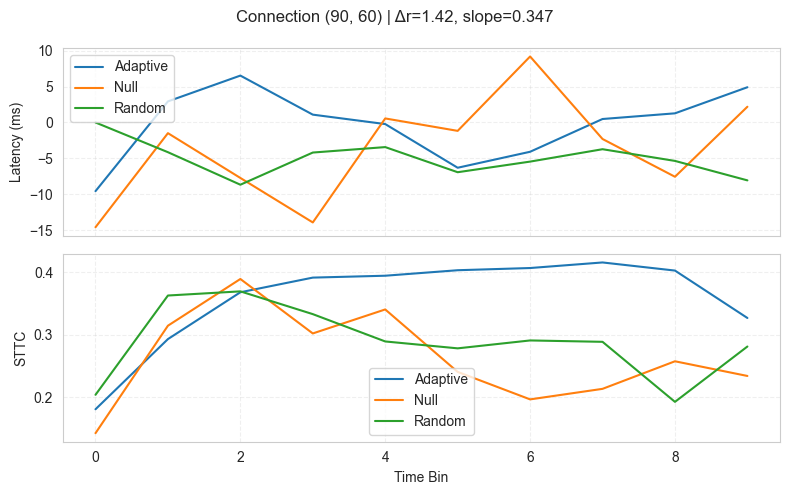

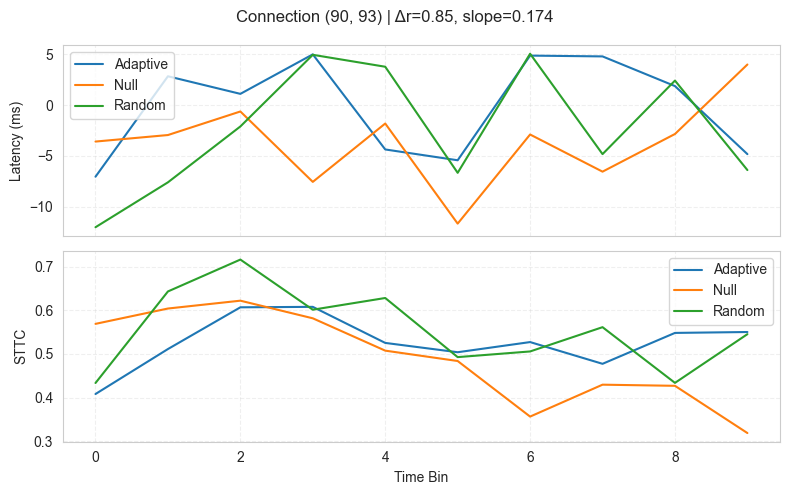

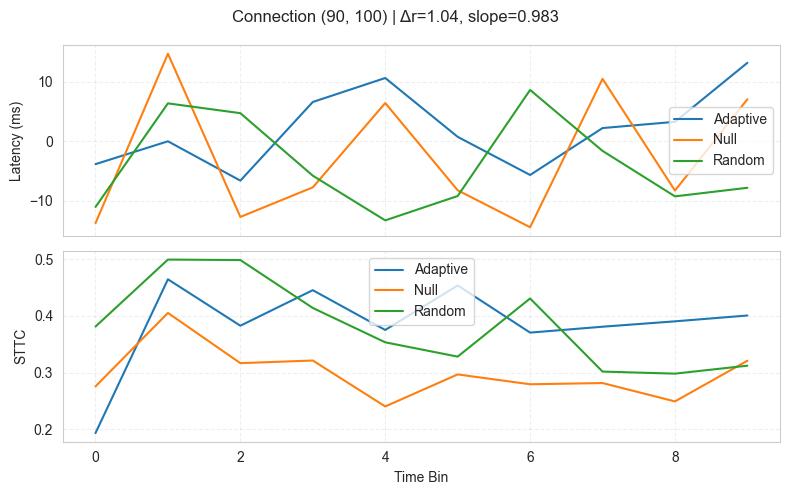

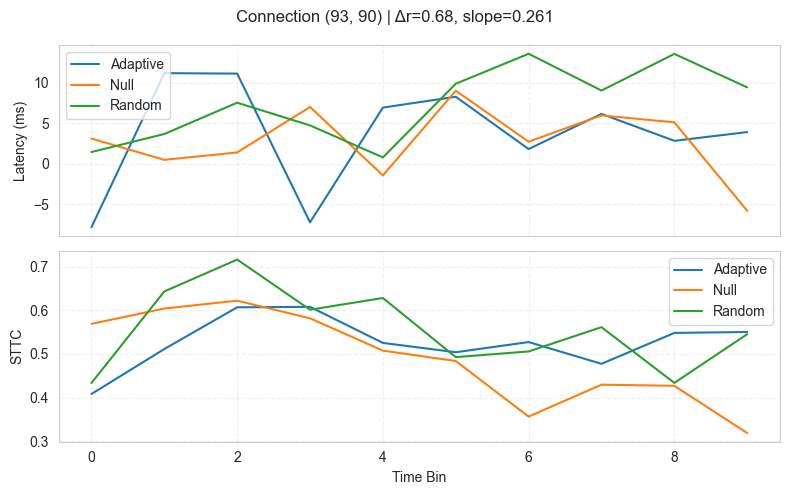

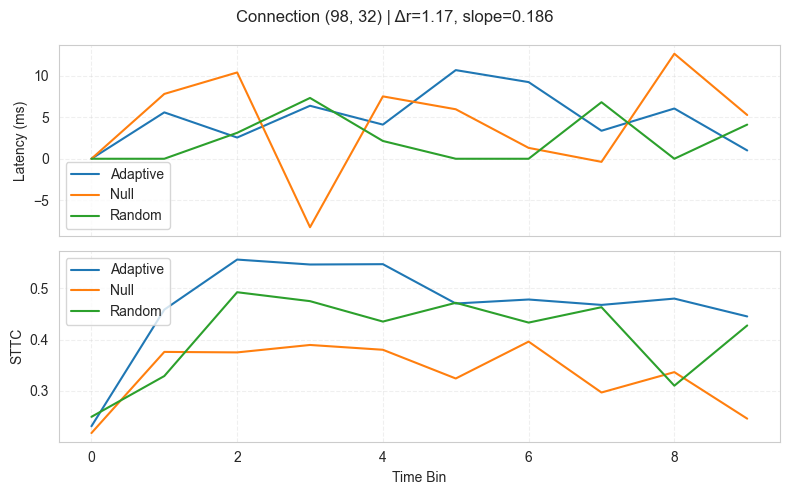

In [46]:
# Time series panel plots of top significant connections to illustrate how latencies and STTC evolved in time across training.
ole.plot_top_connection_trajectories(
    results=results,
    ts_latency=ole.ts_latency,
    ts_sttc=ole.ts_sttc,
    top_n=100  # or 10
)

In [33]:
# === Compute segmented causal matrices for Adaptive, Null, Random ===
for cond in ["Adaptive", "Null", "Random"]:
    ole.segment_and_compute_causal(
        condition=cond,
        bin_size_s=60,         # 1-minute bins
        max_latency_ms=30,     # Short causal window
        bin_size=5,            # Histogram resolution
        order="first",         # or 'multi'
        unit_ids=None          # Use all available units
    )

# === Analyze changes in latency trajectories over time ===
results = ole.analyze_all_latency_changes(
    bin_size_s=60,
    order="first",
    unit_ids=None,               # Or restrict to task units
    min_corr_diff=0.3,
    conditions=("Adaptive", "Null", "Random")
)

# === Convert to DataFrame and show significant pairs ===
import pandas as pd
df_results = pd.DataFrame(results)

# Filter to show only significant changes
significant_df = df_results[df_results["significant"] == True]

# Display significant changes
from IPython.display import display
print(f"Significant pairs found: {len(significant_df)}")
display(significant_df)

Segmenting and computing causal matrices...
Extracting pairwise latency time series...
Analyzing changes in latency trajectories...


/Users/main_mac/data/org_eval/OrgLearningEval.py:662: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(adaptive_ts, ctrl_ts)


Significant pairs found: 10752


pair  adaptive_vs_controls_corr_delta  \
1          (0, 1)                         1.051735   
2          (0, 2)                         1.160447   
3          (0, 3)                         1.032934   
4          (0, 4)                         0.868937   
5          (0, 5)                         1.161311   
...           ...                              ...   
11658  (107, 102)                         1.020092   
11659  (107, 103)                         1.033270   
11660  (107, 104)                         0.593695   
11661  (107, 105)                         0.925505   
11662  (107, 106)                         0.701048   

                                           control_corrs  significant  
1      {'Null': -0.24042095926589357, 'Random': 0.136...         True  
2      {'Null': 0.017468277154186092, 'Random': -0.33...         True  
3      {'Null': -0.05804609957227346, 'Random': -0.00...         True  
4      {'Null': -0.02305048524168085, 'Random': 0.285...         True  
5      {'Null': 0.08832707846408186, 'Random': -0.410...         True  
...                                                  ...          ...  
11658  {'Null': 0.14455668830343898, 'Random': -0.184...         True  
11659  {'Null': -0.035975215300865615, 'Random': -0.0...         True  
11660  {'Null': 0.42687974998698225, 'Random': 0.3857...         True  
11661  {'Null': 0.2690053545462741, 'Random': -0.1200...         True  
11662  {'Null': 0.2999950574856333, 'Random': 0.29790...         True  

[10752 rows x 4 columns]


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Baseline (10–15 min)


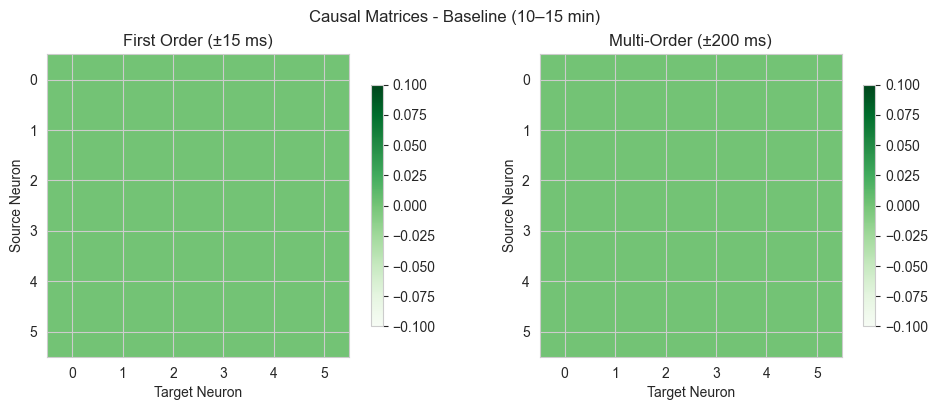


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Adaptive (10–15 min)
  [0, 1] = 10.95 ms
  [0, 2] = -10.21 ms
  [1, 0] = -6.19 ms
  [1, 2] = -1.61 ms
  [1, 3] = -1.62 ms
  [1, 4] = -11.32 ms
  [1, 5] = -8.16 ms
  [2, 1] = 1.67 ms
  [2, 3] = -1.42 ms
  [2, 4] = -8.24 ms
  [2, 5] = 1.51 ms
  [3, 1] = 2.66 ms
  [3, 2] = 4.94 ms
  [3, 4] = -11.71 ms
  [3, 5] = -14.78 ms
  [4, 0] = 9.32 ms
  [4, 2] = 10.41 ms
  [4, 3] = 13.22 ms
  [4, 5] = 0.93 ms
  [5, 1] = 4.03 ms
  [5, 2] = 1.68 ms
  [5, 3] = 9.59 ms
  [5, 4] = -6.41 ms


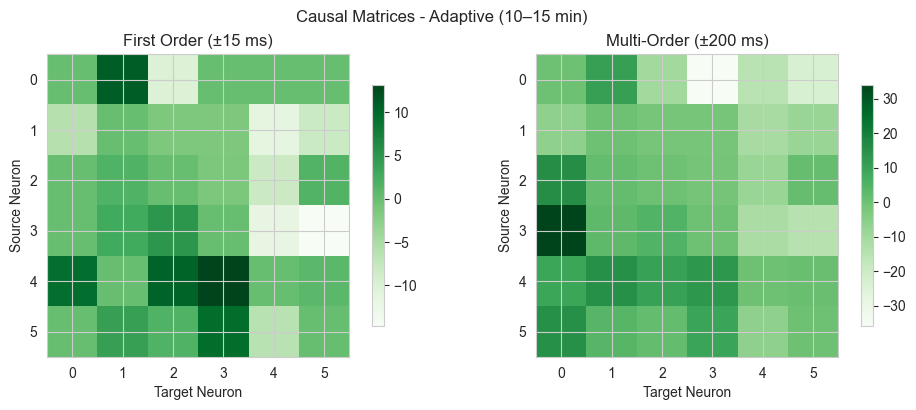


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Random (10–15 min)
  [0, 1] = -0.33 ms
  [0, 2] = -1.18 ms
  [0, 3] = -2.69 ms
  [0, 4] = -3.94 ms
  [0, 5] = 8.72 ms
  [1, 0] = 4.48 ms
  [1, 2] = 1.08 ms
  [1, 3] = 8.62 ms
  [1, 4] = -4.45 ms
  [1, 5] = 1.66 ms
  [2, 0] = 9.07 ms
  [2, 1] = -1.38 ms
  [2, 3] = -8.03 ms
  [2, 4] = -4.20 ms
  [2, 5] = 0.72 ms
  [3, 0] = 5.18 ms
  [3, 1] = -9.47 ms
  [3, 2] = 1.99 ms
  [3, 4] = -6.15 ms
  [3, 5] = -1.48 ms
  [4, 0] = 4.55 ms
  [4, 1] = 4.20 ms
  [4, 2] = 5.78 ms
  [4, 3] = 5.53 ms
  [4, 5] = 1.59 ms
  [5, 0] = -6.47 ms
  [5, 1] = 2.89 ms
  [5, 2] = 5.72 ms
  [5, 3] = 1.87 ms
  [5, 4] = 1.59 ms


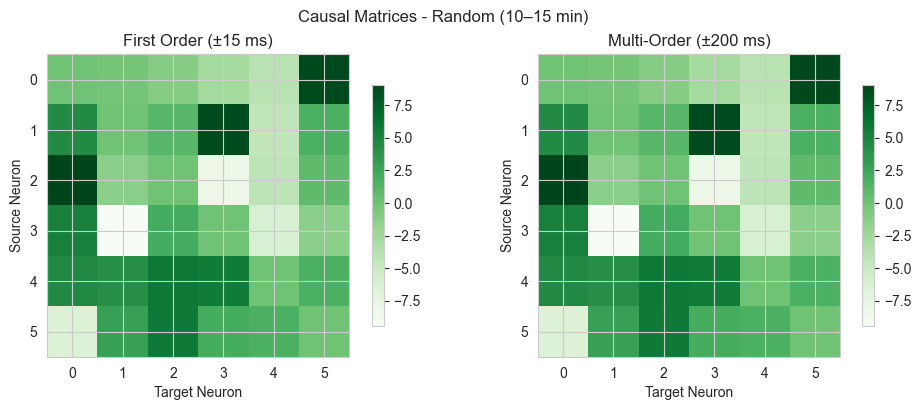


First-Order Weighted Latencies (±15 ms) — Causal Matrices - Null (10–15 min)
  [0, 1] = -14.12 ms
  [0, 2] = 0.90 ms
  [0, 3] = 9.71 ms
  [0, 4] = -5.61 ms
  [0, 5] = -0.69 ms
  [1, 0] = -1.10 ms
  [1, 2] = 3.62 ms
  [1, 3] = -0.17 ms
  [1, 4] = -1.46 ms
  [1, 5] = -0.51 ms
  [2, 0] = 7.08 ms
  [2, 1] = 2.75 ms
  [2, 3] = 1.18 ms
  [2, 4] = -5.29 ms
  [2, 5] = 1.12 ms
  [3, 0] = -3.19 ms
  [3, 1] = -2.25 ms
  [3, 2] = -3.34 ms
  [3, 4] = 4.94 ms
  [3, 5] = 2.70 ms
  [4, 0] = 10.80 ms
  [4, 1] = 1.41 ms
  [4, 2] = 3.00 ms
  [4, 3] = -3.06 ms
  [4, 5] = 3.97 ms
  [5, 0] = 0.05 ms
  [5, 1] = 5.30 ms
  [5, 2] = 6.52 ms
  [5, 3] = -6.06 ms
  [5, 4] = -2.41 ms


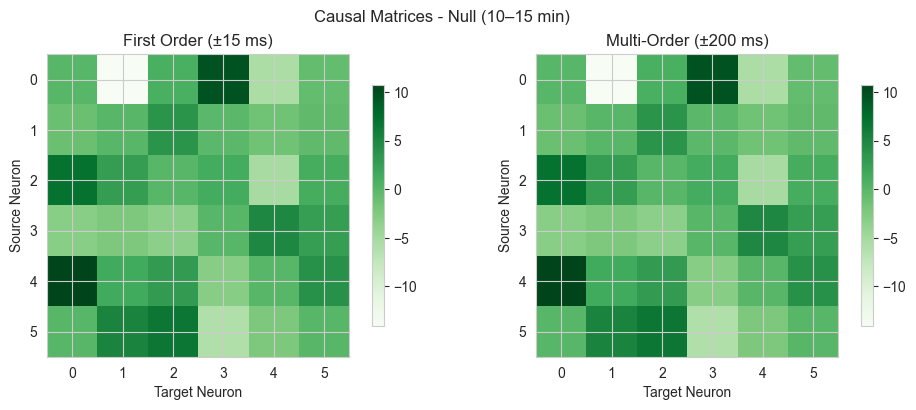

In [55]:
# Compute all causal matrices (first 5 min) — restricted to training neurons
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=600000, end_ms=900000, neuron_ids=training_inds)

# Show causal plots for each condition (restricted to training neurons)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 600000, 900000)]
    multi = ole.multi_order_matrices[(cond, 600000, 900000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (10–15 min)",
                                       inds=training_inds)

In [25]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=0, end_ms=300000)

[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.
[WARNING] No task neuron indices available. Skipping plot.


In [56]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_firing_order_overlay(cond, start_ms=600000, end_ms=900000)

[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.
[WARNING] Empty matrix or coordinates passed to plot_firing_order_overlay. Skipping plot.


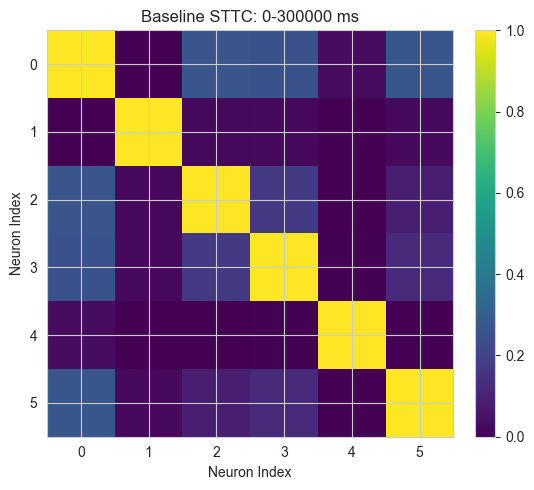

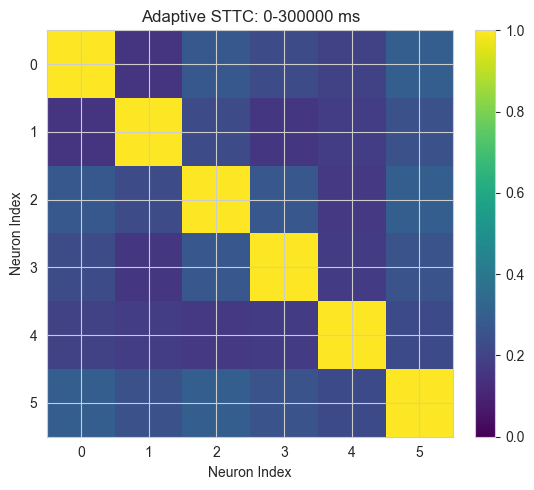

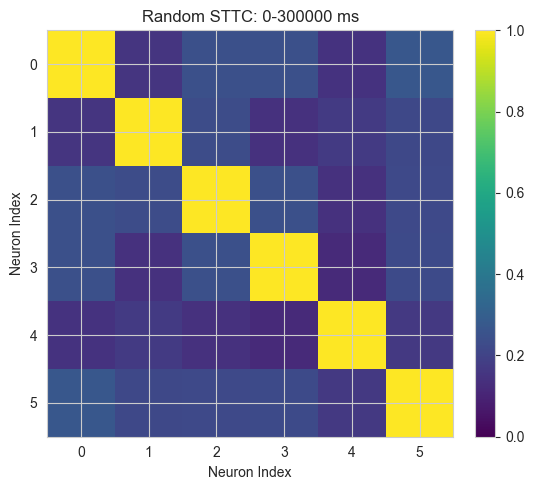

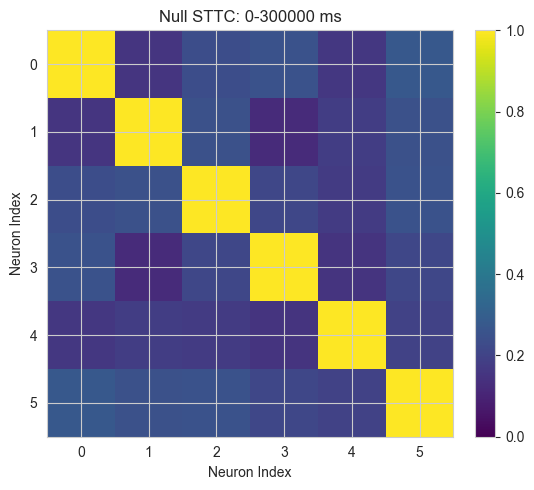

In [36]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=0, end_ms=300000)

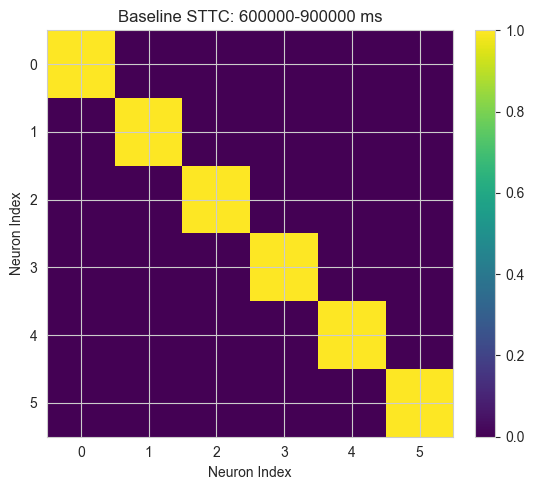

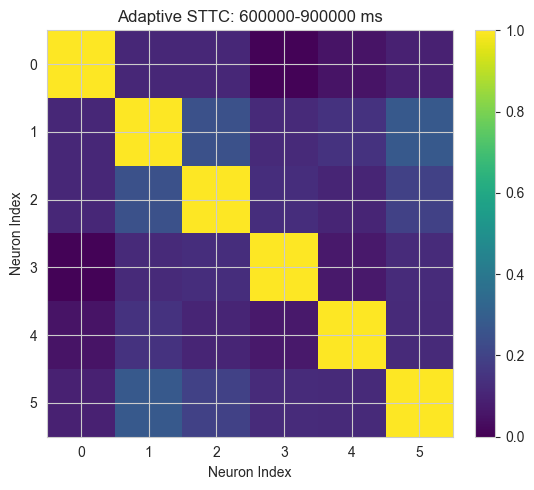

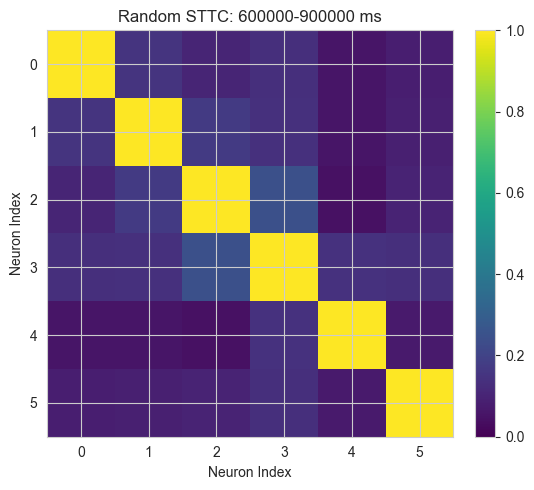

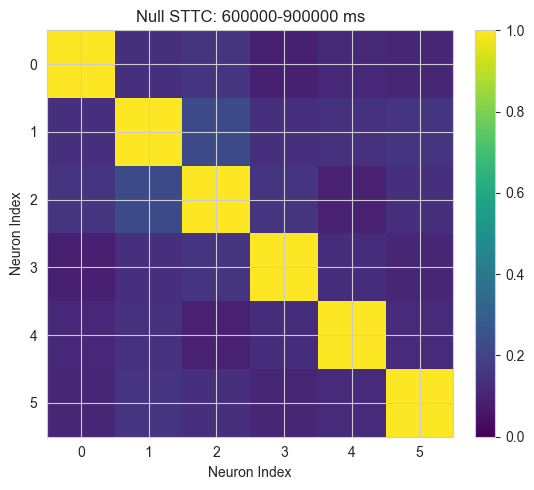

In [37]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_matrix_overlay(cond, start_ms=600000, end_ms=900000)

Max STTC: 1.0
STTC[0, 1] = -0.03
STTC[0, 2] = 0.26
STTC[0, 3] = 0.25
STTC[0, 4] = 0.03
STTC[0, 5] = 0.27
STTC[1, 2] = 0.02
STTC[1, 3] = 0.03
STTC[1, 4] = -0.01
STTC[1, 5] = 0.02
STTC[2, 3] = 0.17
STTC[2, 4] = -0.07
STTC[2, 5] = 0.08
STTC[3, 4] = 0.01
STTC[3, 5] = 0.12
STTC[4, 5] = -0.02


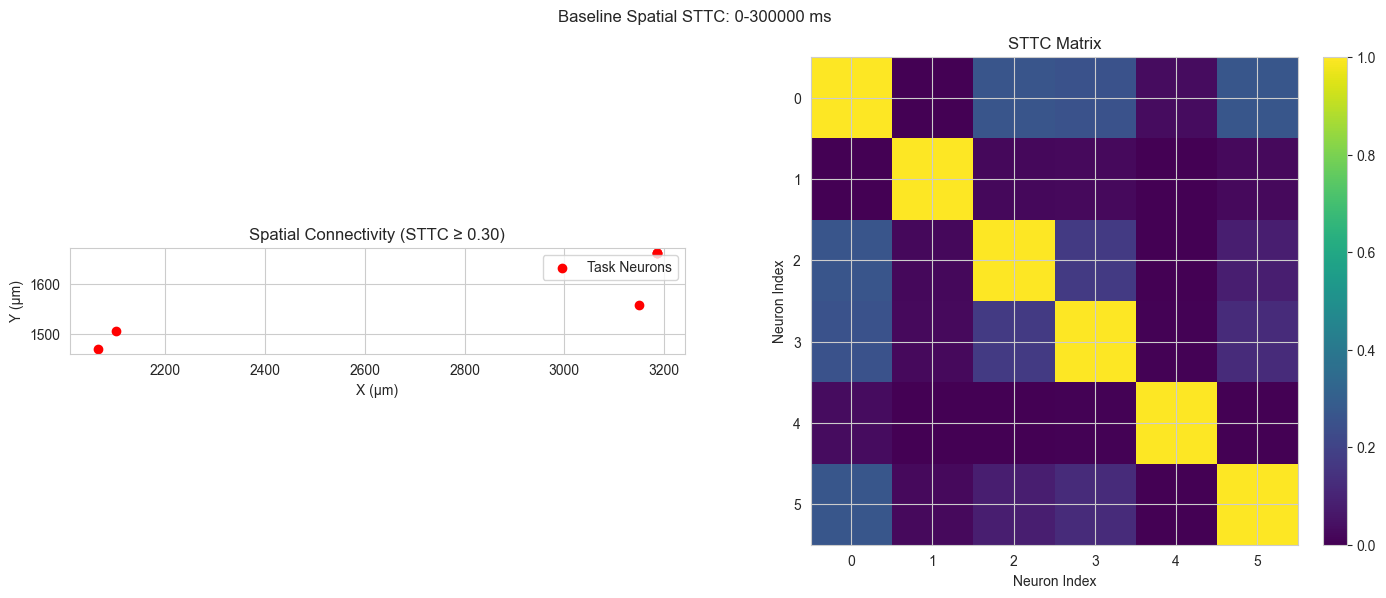

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.28
STTC[0, 3] = 0.23
STTC[0, 4] = 0.20
STTC[0, 5] = 0.30
STTC[1, 2] = 0.23
STTC[1, 3] = 0.16
STTC[1, 4] = 0.18
STTC[1, 5] = 0.25
STTC[2, 3] = 0.27
STTC[2, 4] = 0.17
STTC[2, 5] = 0.30
STTC[3, 4] = 0.18
STTC[3, 5] = 0.26
STTC[4, 5] = 0.22


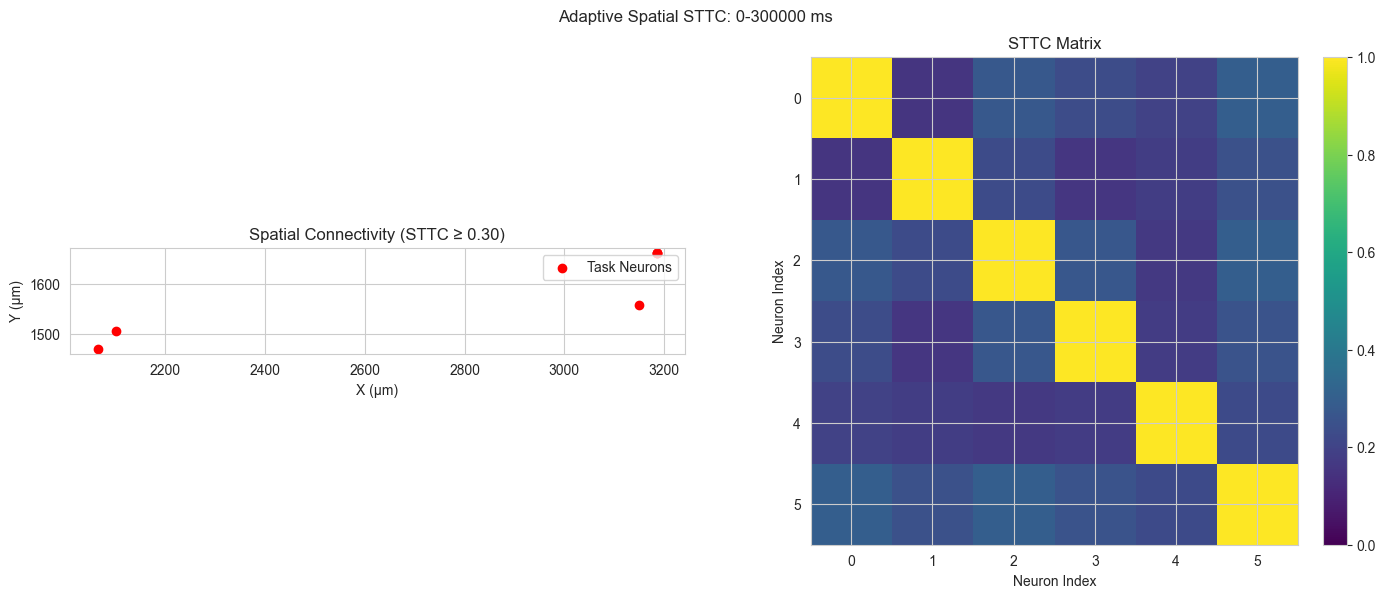

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.25
STTC[0, 3] = 0.25
STTC[0, 4] = 0.15
STTC[0, 5] = 0.27
STTC[1, 2] = 0.23
STTC[1, 3] = 0.14
STTC[1, 4] = 0.17
STTC[1, 5] = 0.22
STTC[2, 3] = 0.24
STTC[2, 4] = 0.14
STTC[2, 5] = 0.22
STTC[3, 4] = 0.12
STTC[3, 5] = 0.23
STTC[4, 5] = 0.17


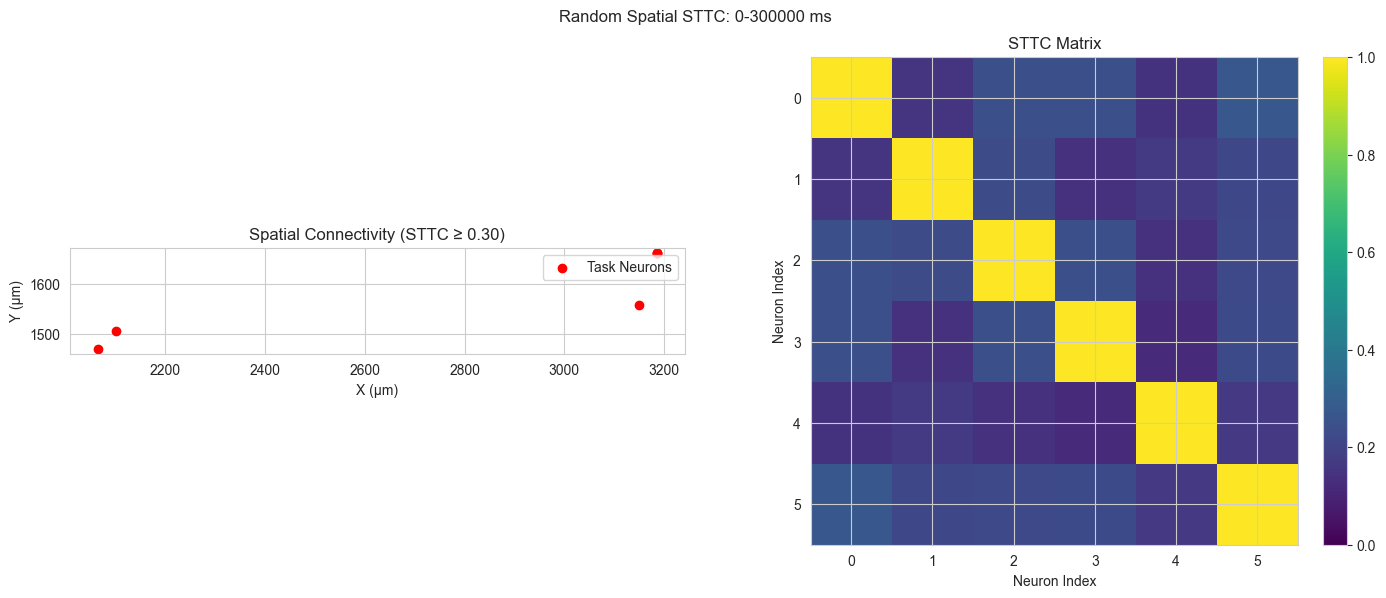

Max STTC: 1.0
STTC[0, 1] = 0.16
STTC[0, 2] = 0.23
STTC[0, 3] = 0.25
STTC[0, 4] = 0.16
STTC[0, 5] = 0.27
STTC[1, 2] = 0.25
STTC[1, 3] = 0.12
STTC[1, 4] = 0.18
STTC[1, 5] = 0.25
STTC[2, 3] = 0.21
STTC[2, 4] = 0.17
STTC[2, 5] = 0.25
STTC[3, 4] = 0.15
STTC[3, 5] = 0.21
STTC[4, 5] = 0.20


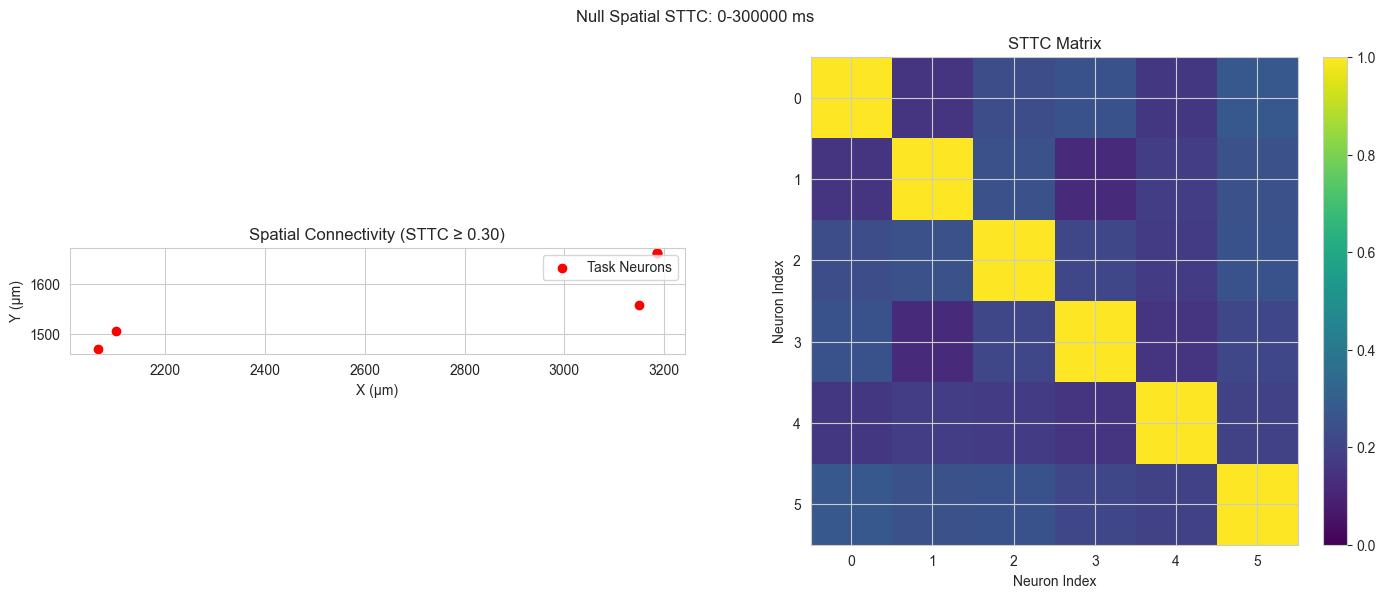

In [38]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=0, end_ms=300000, threshold=0.3)

Max STTC: 1.0
STTC[0, 1] = 0.00
STTC[0, 2] = 0.00
STTC[0, 3] = 0.00
STTC[0, 4] = 0.00
STTC[0, 5] = 0.00
STTC[1, 2] = 0.00
STTC[1, 3] = 0.00
STTC[1, 4] = 0.00
STTC[1, 5] = 0.00
STTC[2, 3] = 0.00
STTC[2, 4] = 0.00
STTC[2, 5] = 0.00
STTC[3, 4] = 0.00
STTC[3, 5] = 0.00
STTC[4, 5] = 0.00


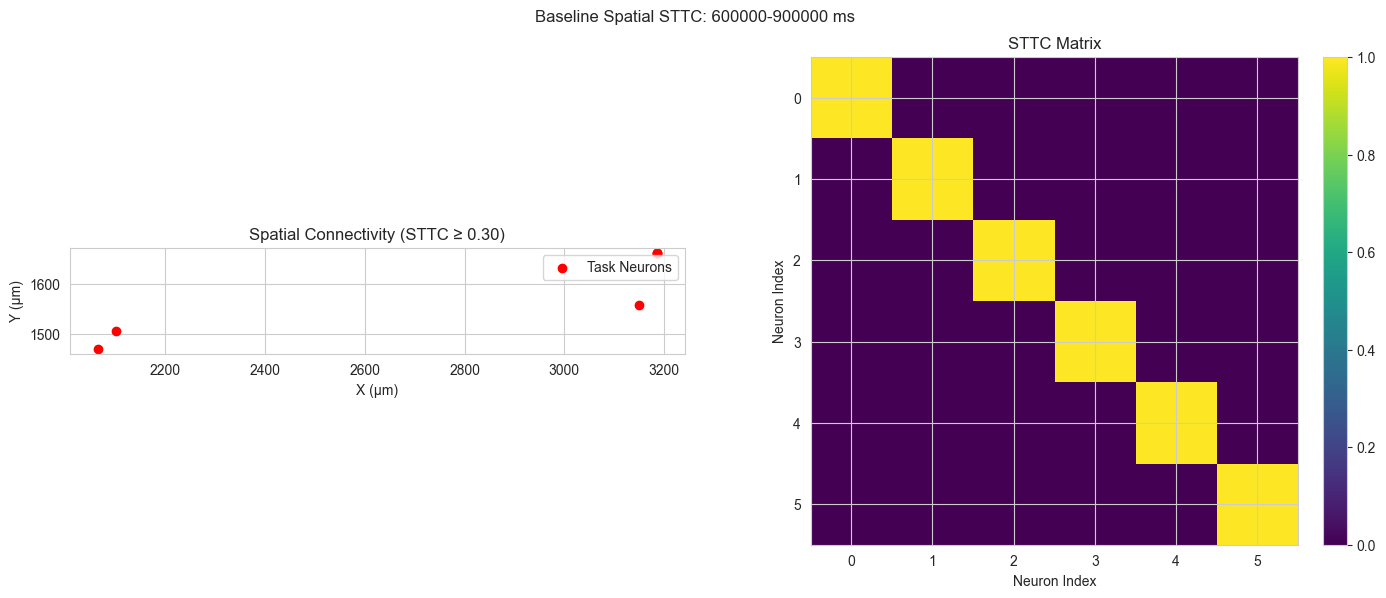

Max STTC: 1.0
STTC[0, 1] = 0.11
STTC[0, 2] = 0.11
STTC[0, 3] = 0.01
STTC[0, 4] = 0.05
STTC[0, 5] = 0.09
STTC[1, 2] = 0.25
STTC[1, 3] = 0.12
STTC[1, 4] = 0.15
STTC[1, 5] = 0.28
STTC[2, 3] = 0.13
STTC[2, 4] = 0.10
STTC[2, 5] = 0.19
STTC[3, 4] = 0.07
STTC[3, 5] = 0.12
STTC[4, 5] = 0.12


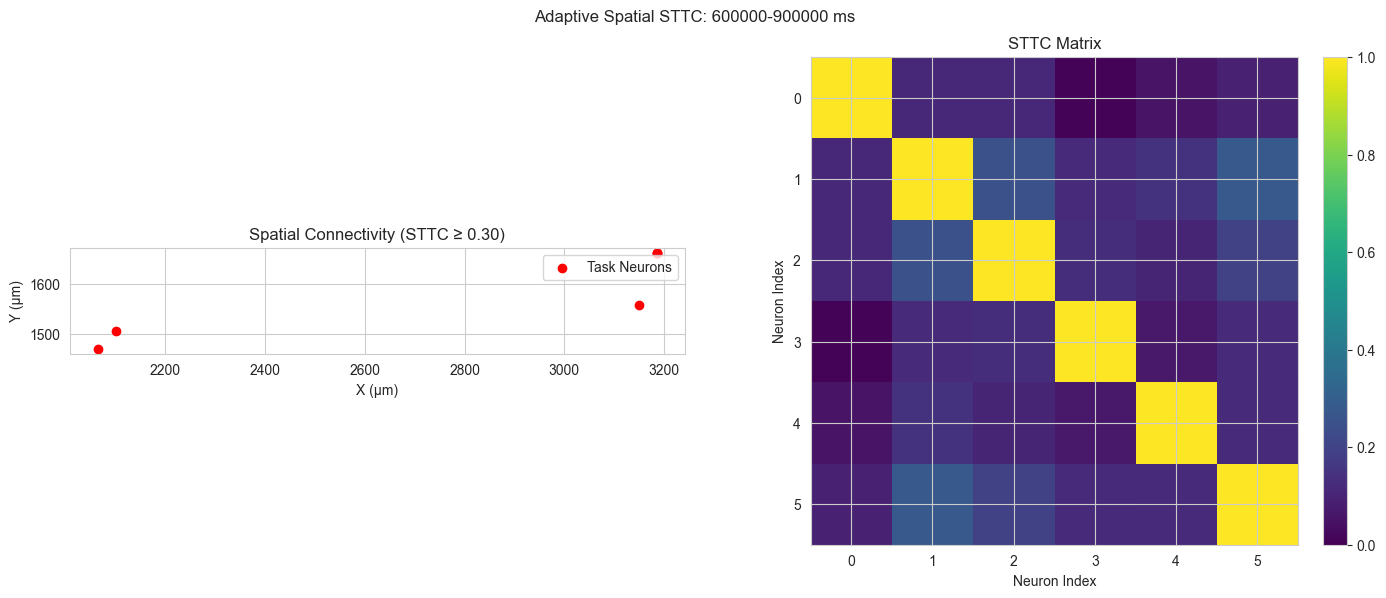

Max STTC: 1.0
STTC[0, 1] = 0.15
STTC[0, 2] = 0.10
STTC[0, 3] = 0.14
STTC[0, 4] = 0.06
STTC[0, 5] = 0.08
STTC[1, 2] = 0.17
STTC[1, 3] = 0.14
STTC[1, 4] = 0.05
STTC[1, 5] = 0.09
STTC[2, 3] = 0.24
STTC[2, 4] = 0.05
STTC[2, 5] = 0.10
STTC[3, 4] = 0.14
STTC[3, 5] = 0.13
STTC[4, 5] = 0.07


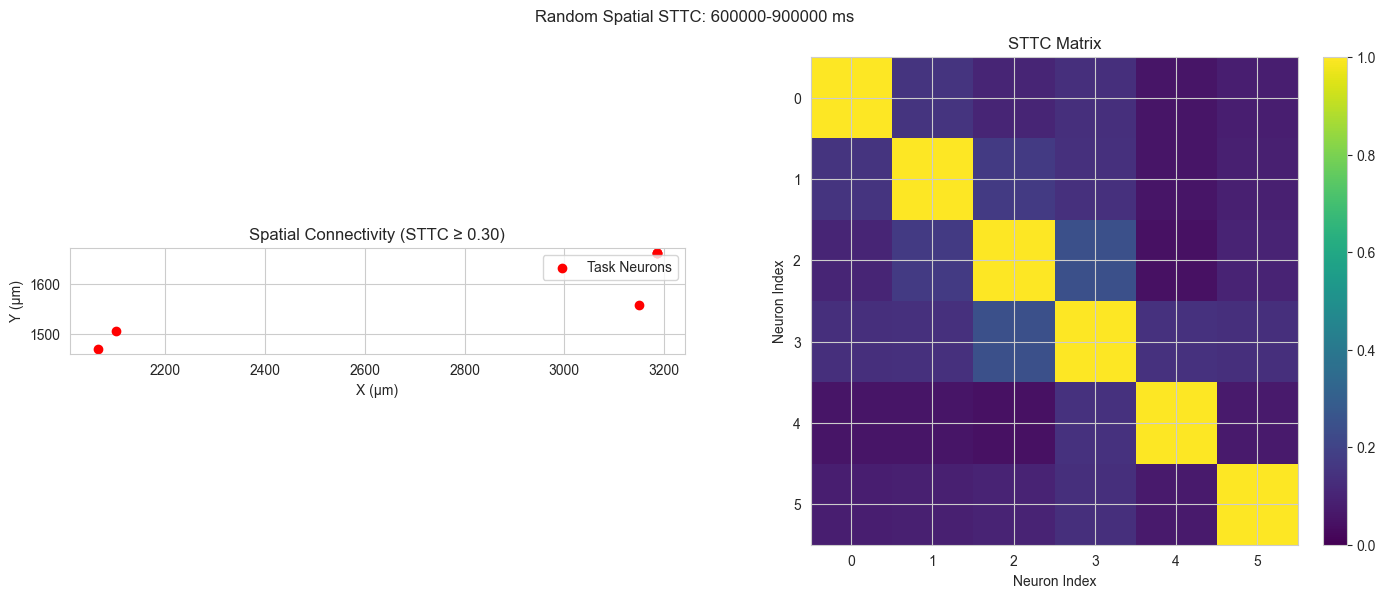

Max STTC: 1.0
STTC[0, 1] = 0.14
STTC[0, 2] = 0.15
STTC[0, 3] = 0.09
STTC[0, 4] = 0.11
STTC[0, 5] = 0.11
STTC[1, 2] = 0.23
STTC[1, 3] = 0.14
STTC[1, 4] = 0.14
STTC[1, 5] = 0.15
STTC[2, 3] = 0.15
STTC[2, 4] = 0.09
STTC[2, 5] = 0.14
STTC[3, 4] = 0.13
STTC[3, 5] = 0.11
STTC[4, 5] = 0.12


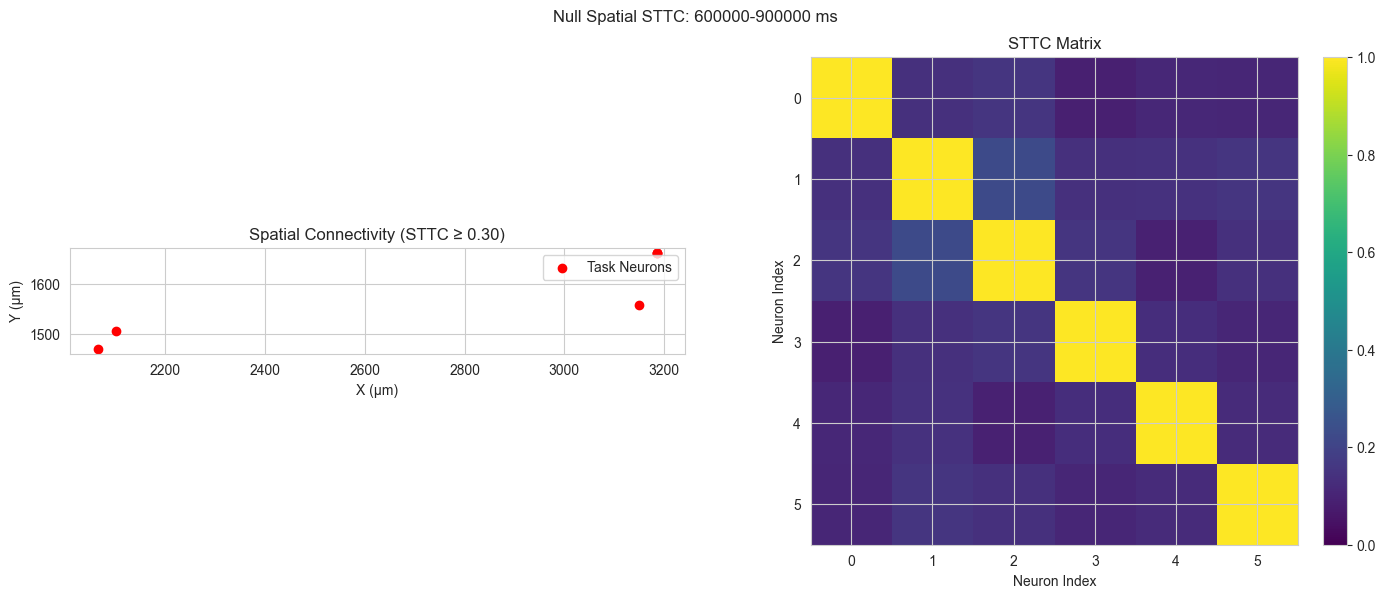

In [39]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.plot_sttc_spatial_overlay(cond, start_ms=600000, end_ms=900000, threshold=0.3)

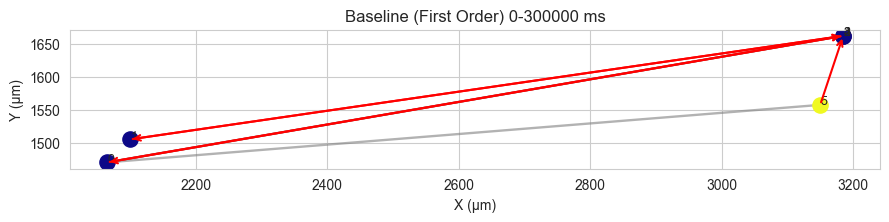

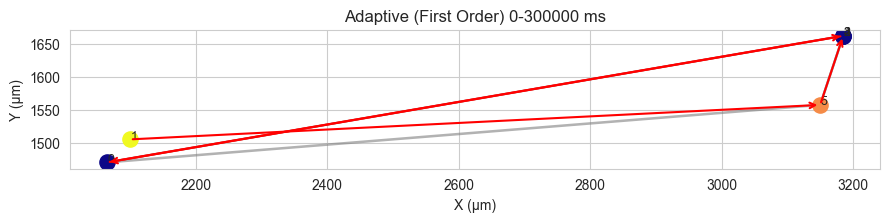

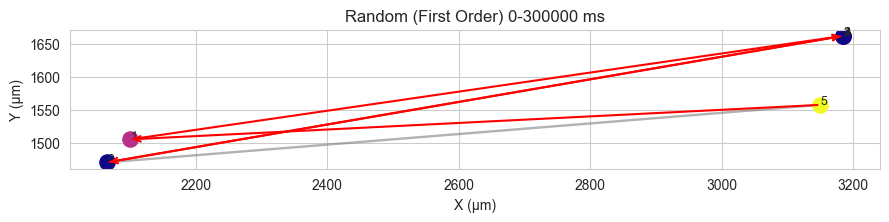

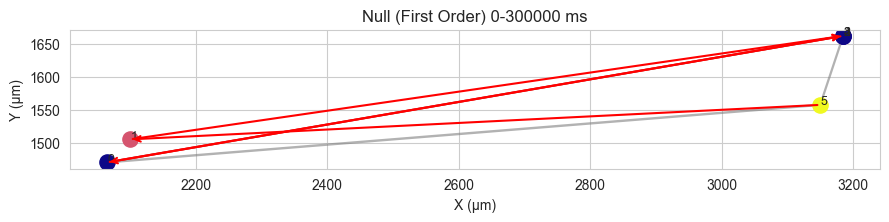

In [40]:
# Generate combined firing + STTC overlay plots for each condition (0–5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_sttc_for_condition(cond, start_ms=0, end_ms=300000)  # ensure STTC is computed
    ole.show_combined_firing_sttc_overlay(
        condition=cond,
        start_ms=0,
        end_ms=300000,
        order="first",              # or "multi" if you want multi-order causality
        top_n=None,                 # use all training neurons
        sttc_threshold=0.25         # only draw STTC connections above this strength
    )


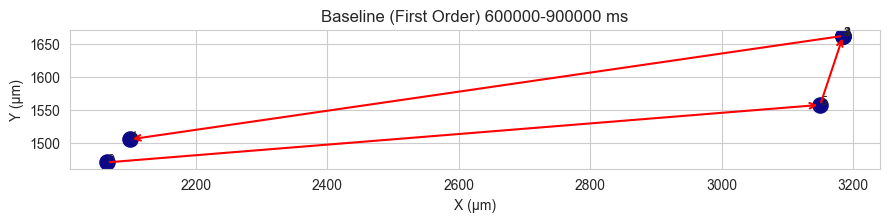

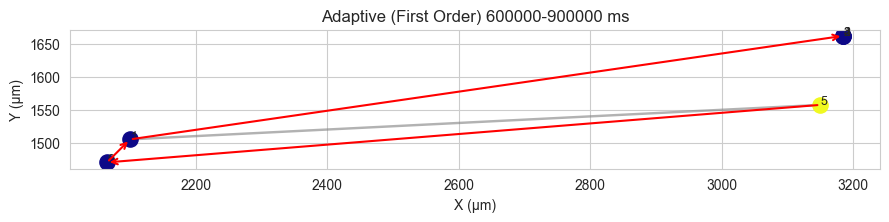

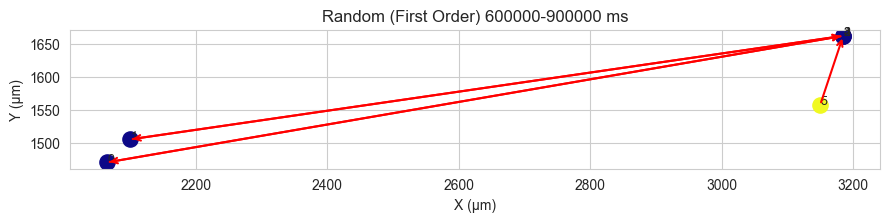

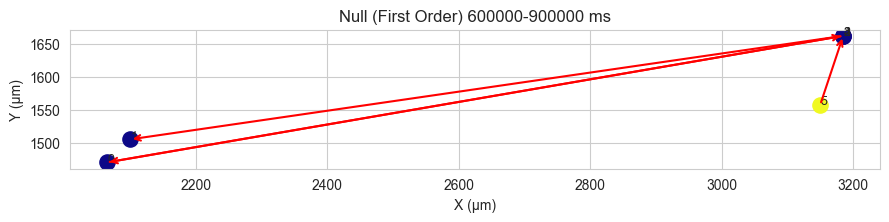

In [41]:
# Generate combined firing + STTC overlay plots for each condition (0–5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_sttc_for_condition(cond, start_ms=600000, end_ms=900000)  # ensure STTC is computed
    ole.show_combined_firing_sttc_overlay(
        condition=cond,
        start_ms=600000,
        end_ms=900000,
        order="first",              # or "multi" if you want multi-order causality
        top_n=None,                 # use all training neurons
        sttc_threshold=0.25         # only draw STTC connections above this strength
    )


In [ ]:
# Define the time window and comparison settings
start_ms = 0  # e.g., 10 min
end_ms = 300000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
# Define time window and comparison settings
start_ms = 600000  # e.g., 10 min
end_ms = 900000    # e.g., 15 min
order = "first"    # or "multi"

# Run comparison for two conditions
diff_matrix, stats = ole.compare_causal_matrices("Baseline", "Adaptive",
                                                 order=order,
                                                 start_ms=start_ms,
                                                 end_ms=end_ms,
                                                 show_plot=True)

In [ ]:
# Print summary statistics of the difference matrix
print("Causal Matrix Comparison (Baseline → Adaptive):")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")

# Convert to DataFrame for visual inspection (optional)
diff_df = pd.DataFrame(diff_matrix)
diff_df.style.background_gradient(cmap="bwr", axis=None)

In [ ]:
df_sttc_timecourse = OrgLearningEval.plot_sttc_over_time(
    ole,
    conditions=["Baseline", "Adaptive", "Random", "Null"],
    window_ms=60000,   # 1-minute windows
    step_ms=30000      # 30-second steps
)

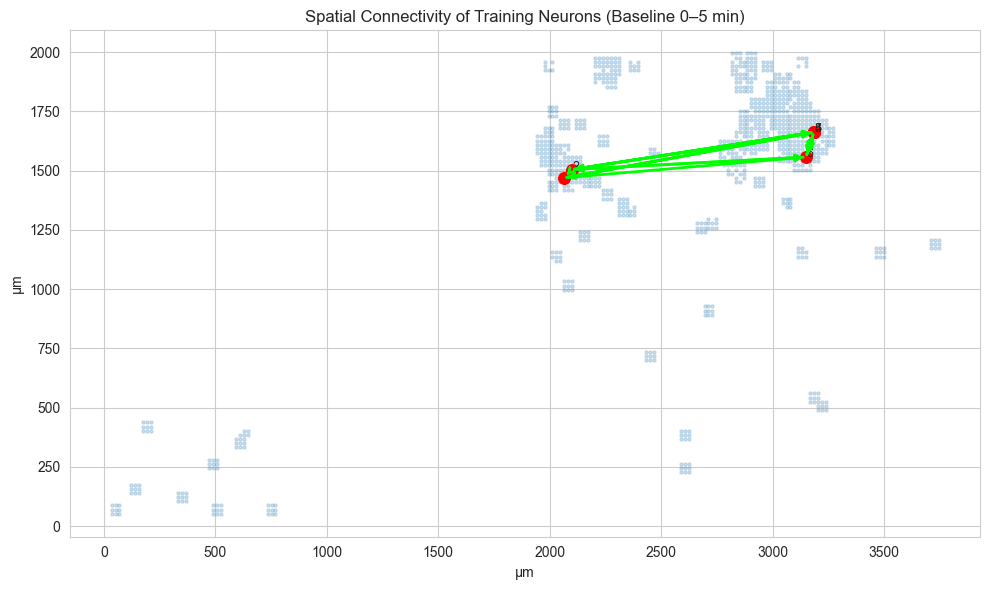

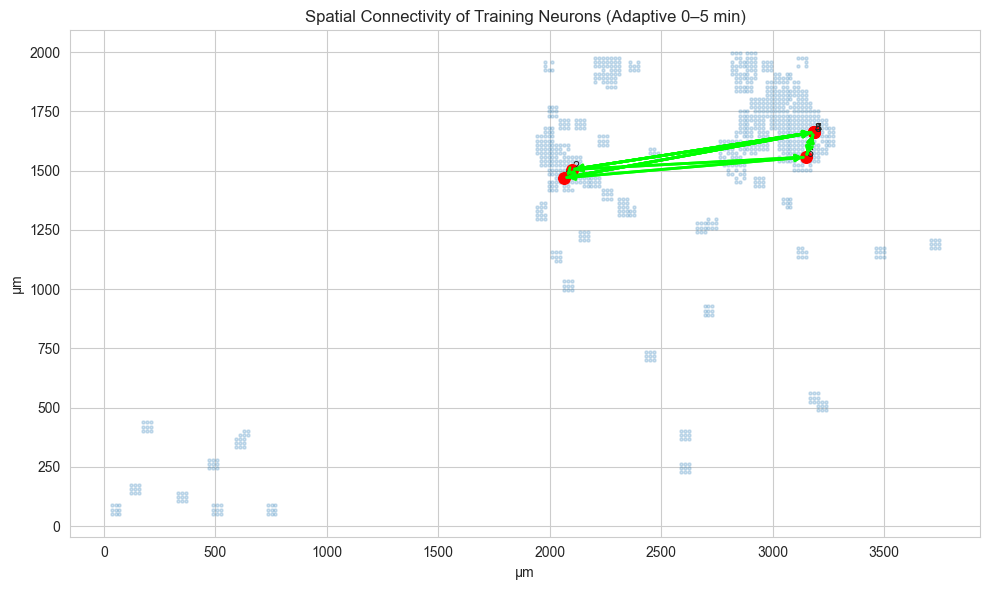

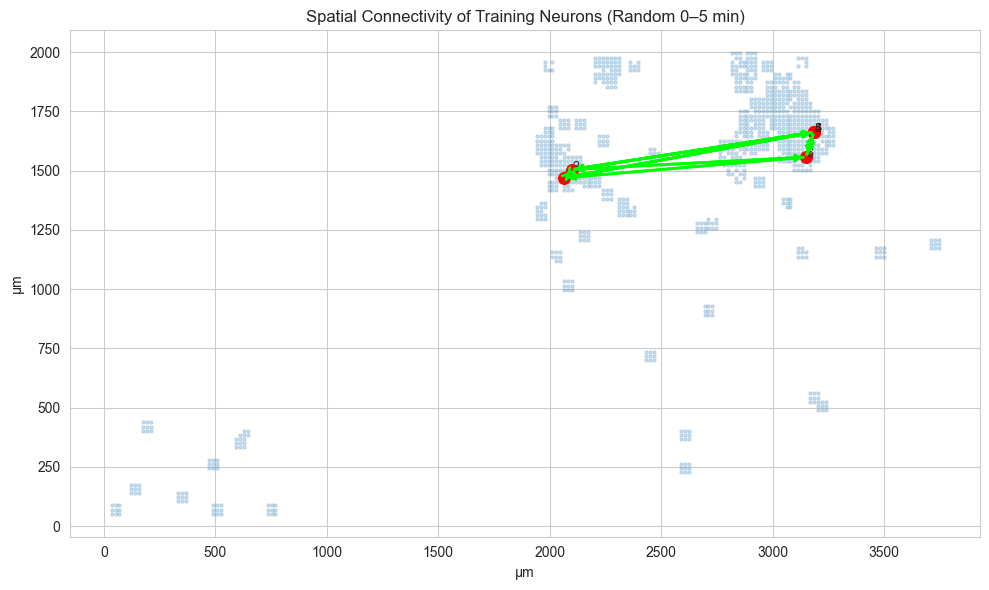

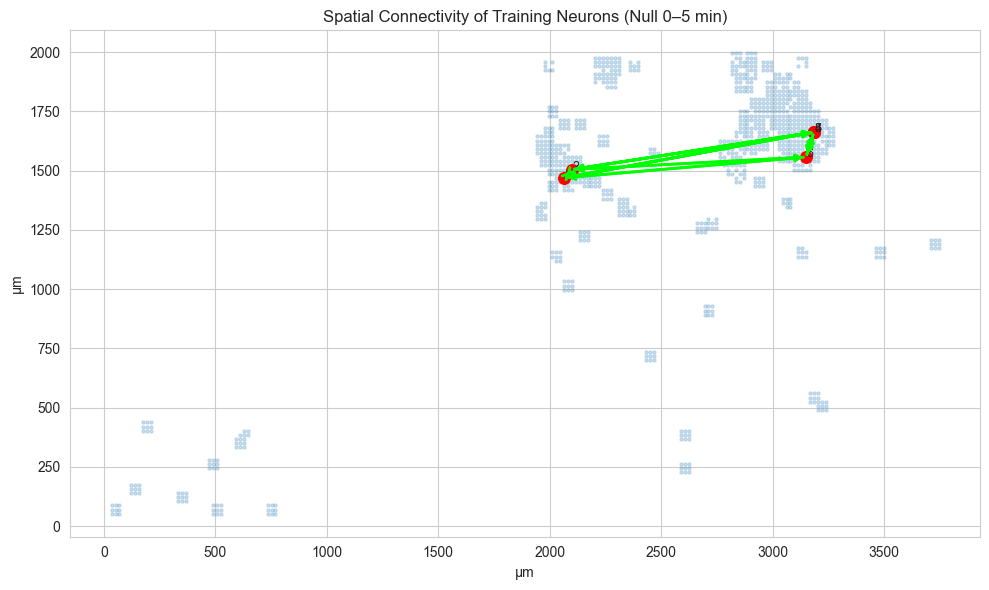

In [42]:
# Show spatial connectivity maps (first-order, training neurons only)
ole.show_training_spatial_connectivity_all_conditions()

In [43]:
# Compute latency histograms and top firing sequences
ole.compute_latency_histograms(window_ms=50, bin_size=5)
ole.compute_firing_orders(window_ms=100, top_k=10)

# Show latency histogram for a specific neuron pair
ole.show_latency_histogram("Adaptive", i=3, j=7)

# Visualize top firing orders for each condition
ole.show_firing_order_summary("Adaptive")
ole.show_firing_order_summary("Random")
ole.show_firing_order_summary("Null")

AttributeError: module 'core.spike_data_utils' has no attribute 'extract_common_firing_orders'

In [31]:
ole.compute_bursts()

In [32]:
ole.show_burst_stats("Adaptive")
ole.show_within_burst_dynamics("Adaptive")
ole.show_burst_latency_consistency("Adaptive")
ole.show_burst_propagation("Adaptive")

ValueError: too many values to unpack (expected 2)

In [33]:
ole.compare_burst_stats()
ole.compare_within_burst_dynamics()
ole.compare_burst_latency_consistency()
ole.compare_burst_propagation()

ValueError: too many values to unpack (expected 2)